##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# 과대적합과 과소적합

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/overfit_and_underfit"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a>   </td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드</a></td>
</table>

지금까지 그랬듯이 이 예제의 코드도 `tf.keras` API를 사용합니다. 텐서플로 [케라스 가이드](https://www.tensorflow.org/guide/keras)에서 `tf.keras` API에 대해 더 많은 정보를 얻을 수 있습니다.

[텍스트 분류](text_classification_with_hub.ipynb) 및 [연료 효율성 예측](regression.ipynb)이라는 두 가지 이전의 예에서 검증 데이터에 대한 모델의 정확도가 여러 에포크 동안 훈련 후에 정점에 도달한 다음 정체되거나 감소하기 시작할 수 있습니다.

즉, 여기서의 모델은 훈련 데이터에 *과대적합됩니다*. 과대적합에 대처하는 방법을 배우는 것은 중요합니다. *훈련 세트*에서 높은 정확도를 달성하는 것은 종종 가능하지만 여러분이 정말로 원하는 것은 *테스트 세트*(또는 이전에 본 적 없는 데이터)에서 잘 일반화되는 모델을 개발하는 것입니다.

과대적합의 반대는 *과소적합*(underfitting)입니다. 과소적합은 테스트 세트의 성능이 향상될 여지가 아직 있을 때 일어납니다. 발생하는 원인은 여러가지입니다. 모델이 너무 단순하거나, 규제가 너무 많거나, 그냥 단순히 충분히 오래 훈련하지 않는 경우입니다. 즉 네트워크가 훈련 세트에서 적절한 패턴을 학습하지 못했다는 뜻입니다.

너무 오래 훈련하면 모델이 과대적합을 시작하며 테스트 데이터에 일반화되지 않는 훈련 데이터로부터 패턴을 학습합니다. 이러한 경우 균형을 잘 잡아야 합니다. 아래에서 탐색할 적절한 epoch 수로 훈련하는 방법을 이해하는 것은 유용한 기술입니다.

과적합을 방지하기 위한 최상의 솔루션은 더 완전한 훈련 데이터를 사용하는 것입니다. 데이터세트는 모델이 처리할 것으로 예상되는 전체 입력 범위를 포괄해야 합니다. 추가 데이터는 새롭고 흥미로운 사례를 다루는 경우에만 유용할 수 있습니다.

더 완전한 데이터로 훈련된 모델은 자연스럽게 더 잘 일반화됩니다. 이것이 더 이상 불가능할 경우, 차선책은 정규화와 같은 기술을 사용하는 것입니다. 이는 모델이 저장할 수 있는 정보의 양과 유형에 제약을 가합니다. 네트워크가 적은 수의 패턴만 기억할 수 있다면 최적화 프로세스는 일반화 가능성이 더 높은 가장 두드러진 패턴에 중점을 두도록 합니다.

이 노트북에서는 몇 가지 일반적인 정규화 기술을 살펴보고 이를 분류 모델 개선에 사용합니다.

## 설정

시작하기 전에 필요한 패키지를 가져옵니다.

In [3]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2022-12-14 20:25:40.953871: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 20:25:40.953969: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 20:25:40.953978: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


2.11.0


In [4]:
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

  Cloning https://github.com/tensorflow/docs to /tmpfs/tmp/pip-req-build-e4b6711m
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmpfs/tmp/pip-req-build-e4b6711m


  Resolved https://github.com/tensorflow/docs to commit 7ec3498211be67edf739754575ee4745c05b95ef


  Preparing metadata (setup.py) ... -

 done


 \

 done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=180390 sha256=db0a6031cfcf642f6dcacf7c80804c940eebc888212cf336d7c175fce24653df
  Stored in directory: /tmpfs/tmp/pip-ephem-wheel-cache-qrpwcz6o/wheels/fc/f8/3b/5d21409a59cb1be9b1ade11f682039ced75b84de9dd6a0c8de
Successfully built tensorflow-docs


In [5]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile


In [6]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

## 힉스(Higgs) 데이터세트

이 튜토리얼의 목표는 입자 물리학을 수행하는 것이 아니므로 데이터 세트의 세부 사항에 집착하지 마세요. 여기에는 각각 28개의 특성과 이진 클래스 레이블이 있는 11,000,000개의 예제가 포함되어 있습니다.

In [7]:
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')


      8192/2816407858 [..............................] - ETA: 2s


     16384/2816407858 [..............................] - ETA: 2:30:27


     49152/2816407858 [..............................] - ETA: 1:42:54


     90112/2816407858 [..............................] - ETA: 1:29:01


    196608/2816407858 [..............................] - ETA: 57:18  


    335872/2816407858 [..............................] - ETA: 40:35


    811008/2816407858 [..............................] - ETA: 19:42


   1015808/2816407858 [..............................] - ETA: 27:25


   2015232/2816407858 [..............................] - ETA: 14:59


   2793472/2816407858 [..............................] - ETA: 18:52


   3514368/2816407858 [..............................] - ETA: 21:56


   4063232/2816407858 [..............................] - ETA: 19:32


   4431872/2816407858 [..............................] - ETA: 22:54


   4497408/2816407858 [..............................] - ETA: 27:53


   4775936/2816407858 [..............................] - ETA: 26:45


   5349376/2816407858 [..............................] - ETA: 24:18


   6275072/2816407858 [..............................] - ETA: 21:05


   6856704/2816407858 [..............................] - ETA: 22:09


   8036352/2816407858 [..............................] - ETA: 21:59


   9322496/2816407858 [..............................] - ETA: 19:11


  11911168/2816407858 [..............................] - ETA: 15:12


  12779520/2816407858 [..............................] - ETA: 15:59


  15302656/2816407858 [..............................] - ETA: 13:29


  17408000/2816407858 [..............................] - ETA: 13:16


  18669568/2816407858 [..............................] - ETA: 12:30


  21176320/2816407858 [..............................] - ETA: 11:07


  21471232/2816407858 [..............................] - ETA: 12:01


  23961600/2816407858 [..............................] - ETA: 10:51


  27156480/2816407858 [..............................] - ETA: 9:39 


  29122560/2816407858 [..............................] - ETA: 9:50


  30089216/2816407858 [..............................] - ETA: 10:20


  30695424/2816407858 [..............................] - ETA: 10:12


  31793152/2816407858 [..............................] - ETA: 10:33


  32186368/2816407858 [..............................] - ETA: 11:09


  32505856/2816407858 [..............................] - ETA: 11:07


  33234944/2816407858 [..............................] - ETA: 10:56


  33366016/2816407858 [..............................] - ETA: 11:29


  34250752/2816407858 [..............................] - ETA: 11:15


  35201024/2816407858 [..............................] - ETA: 11:38


  36446208/2816407858 [..............................] - ETA: 11:54


  37101568/2816407858 [..............................] - ETA: 12:21


  37232640/2816407858 [..............................] - ETA: 12:56


  37445632/2816407858 [..............................] - ETA: 12:55


  37666816/2816407858 [..............................] - ETA: 12:54


  38330368/2816407858 [..............................] - ETA: 12:44


  39518208/2816407858 [..............................] - ETA: 12:25


  40927232/2816407858 [..............................] - ETA: 12:02


  43253760/2816407858 [..............................] - ETA: 11:26


  44269568/2816407858 [..............................] - ETA: 11:39


  45907968/2816407858 [..............................] - ETA: 11:46


  46964736/2816407858 [..............................] - ETA: 11:33


  47087616/2816407858 [..............................] - ETA: 12:28


  47439872/2816407858 [..............................] - ETA: 12:26


  47611904/2816407858 [..............................] - ETA: 12:50


  48103424/2816407858 [..............................] - ETA: 12:45


  48201728/2816407858 [..............................] - ETA: 13:11


  48758784/2816407858 [..............................] - ETA: 13:04


  49840128/2816407858 [..............................] - ETA: 13:13


  50429952/2816407858 [..............................] - ETA: 13:32


  50495488/2816407858 [..............................] - ETA: 13:59


  50610176/2816407858 [..............................] - ETA: 14:00


  50880512/2816407858 [..............................] - ETA: 13:58


  51339264/2816407858 [..............................] - ETA: 13:53


  51609600/2816407858 [..............................] - ETA: 14:09


  51675136/2816407858 [..............................] - ETA: 14:35


  51904512/2816407858 [..............................] - ETA: 14:34


  52264960/2816407858 [..............................] - ETA: 14:30


  53141504/2816407858 [..............................] - ETA: 14:18


  54362112/2816407858 [..............................] - ETA: 14:19


  55910400/2816407858 [..............................] - ETA: 13:57


  56524800/2816407858 [..............................] - ETA: 14:12


  57507840/2816407858 [..............................] - ETA: 14:22


  58105856/2816407858 [..............................] - ETA: 14:16


  58949632/2816407858 [..............................] - ETA: 14:26


  59146240/2816407858 [..............................] - ETA: 14:47


  59514880/2816407858 [..............................] - ETA: 14:43


  59604992/2816407858 [..............................] - ETA: 15:04


  60129280/2816407858 [..............................] - ETA: 15:19


  60194816/2816407858 [..............................] - ETA: 15:42


  60424192/2816407858 [..............................] - ETA: 15:40


  60653568/2816407858 [..............................] - ETA: 15:39


  61276160/2816407858 [..............................] - ETA: 15:31


  61571072/2816407858 [..............................] - ETA: 15:44


  61636608/2816407858 [..............................] - ETA: 16:06


  61931520/2816407858 [..............................] - ETA: 16:03


  62439424/2816407858 [..............................] - ETA: 15:57


  62619648/2816407858 [..............................] - ETA: 16:13


  63406080/2816407858 [..............................] - ETA: 16:03


  64692224/2816407858 [..............................] - ETA: 15:46


  65503232/2816407858 [..............................] - ETA: 15:52


  66846720/2816407858 [..............................] - ETA: 15:35


  68911104/2816407858 [..............................] - ETA: 15:08


  72032256/2816407858 [..............................] - ETA: 14:29


  74227712/2816407858 [..............................] - ETA: 14:05


  76693504/2816407858 [..............................] - ETA: 13:39


  79839232/2816407858 [..............................] - ETA: 13:07


  82731008/2816407858 [..............................] - ETA: 12:41


  85622784/2816407858 [..............................] - ETA: 12:16


  87392256/2816407858 [..............................] - ETA: 12:02


  87654400/2816407858 [..............................] - ETA: 12:15


  88907776/2816407858 [..............................] - ETA: 12:06


  90341376/2816407858 [..............................] - ETA: 12:10


  92241920/2816407858 [..............................] - ETA: 11:56


  94470144/2816407858 [>.............................] - ETA: 11:40


  97484800/2816407858 [>.............................] - ETA: 11:19


 100302848/2816407858 [>.............................] - ETA: 11:00


 102924288/2816407858 [>.............................] - ETA: 10:44


 105742336/2816407858 [>.............................] - ETA: 10:28


 108519424/2816407858 [>.............................] - ETA: 10:12


 109150208/2816407858 [>.............................] - ETA: 10:22


 110518272/2816407858 [>.............................] - ETA: 10:15


 112427008/2816407858 [>.............................] - ETA: 10:16


 112754688/2816407858 [>.............................] - ETA: 10:27


 113557504/2816407858 [>.............................] - ETA: 10:24


 114065408/2816407858 [>.............................] - ETA: 10:33


 114589696/2816407858 [>.............................] - ETA: 10:42


 115064832/2816407858 [>.............................] - ETA: 10:41


 115630080/2816407858 [>.............................] - ETA: 10:39


 117055488/2816407858 [>.............................] - ETA: 10:32


 117473280/2816407858 [>.............................] - ETA: 10:39


 118456320/2816407858 [>.............................] - ETA: 10:57


 118521856/2816407858 [>.............................] - ETA: 11:08


 118620160/2816407858 [>.............................] - ETA: 11:10


 118833152/2816407858 [>.............................] - ETA: 11:10


 119250944/2816407858 [>.............................] - ETA: 11:09


 120143872/2816407858 [>.............................] - ETA: 11:05


 121143296/2816407858 [>.............................] - ETA: 11:00


 123748352/2816407858 [>.............................] - ETA: 10:52


 126582784/2816407858 [>.............................] - ETA: 10:38


 127287296/2816407858 [>.............................] - ETA: 10:45


 128548864/2816407858 [>.............................] - ETA: 10:39


 130940928/2816407858 [>.............................] - ETA: 10:28


 133341184/2816407858 [>.............................] - ETA: 10:17


 136388608/2816407858 [>.............................] - ETA: 10:04


 139132928/2816407858 [>.............................] - ETA: 9:52 


 141770752/2816407858 [>.............................] - ETA: 9:42


 143392768/2816407858 [>.............................] - ETA: 9:36


 146046976/2816407858 [>.............................] - ETA: 9:26


 148979712/2816407858 [>.............................] - ETA: 9:15


 151674880/2816407858 [>.............................] - ETA: 9:05


 153329664/2816407858 [>.............................] - ETA: 9:00


 156188672/2816407858 [>.............................] - ETA: 8:50


 156254208/2816407858 [>.............................] - ETA: 8:59


 157515776/2816407858 [>.............................] - ETA: 8:55


 157827072/2816407858 [>.............................] - ETA: 9:02


 158547968/2816407858 [>.............................] - ETA: 9:08


 159023104/2816407858 [>.............................] - ETA: 9:07


 159907840/2816407858 [>.............................] - ETA: 9:05


 160645120/2816407858 [>.............................] - ETA: 9:10


 161849344/2816407858 [>.............................] - ETA: 9:06


 164274176/2816407858 [>.............................] - ETA: 8:58


 167436288/2816407858 [>.............................] - ETA: 8:48


 170639360/2816407858 [>.............................] - ETA: 8:39


 173490176/2816407858 [>.............................] - ETA: 8:30


 175636480/2816407858 [>.............................] - ETA: 8:24


 177627136/2816407858 [>.............................] - ETA: 8:19


 180346880/2816407858 [>.............................] - ETA: 8:12


 182812672/2816407858 [>.............................] - ETA: 8:05


 185417728/2816407858 [>.............................] - ETA: 7:59


 187973632/2816407858 [=>............................] - ETA: 7:53


 190988288/2816407858 [=>............................] - ETA: 7:45


 193912832/2816407858 [=>............................] - ETA: 7:39


 196296704/2816407858 [=>............................] - ETA: 7:33


 197795840/2816407858 [=>............................] - ETA: 7:30


 200622080/2816407858 [=>............................] - ETA: 7:24


 203735040/2816407858 [=>............................] - ETA: 7:17


 206110720/2816407858 [=>............................] - ETA: 7:13


 207765504/2816407858 [=>............................] - ETA: 7:09


 210739200/2816407858 [=>............................] - ETA: 7:04


 213622784/2816407858 [=>............................] - ETA: 6:58


 215695360/2816407858 [=>............................] - ETA: 7:00


 216956928/2816407858 [=>............................] - ETA: 6:58


 218185728/2816407858 [=>............................] - ETA: 7:02


 218841088/2816407858 [=>............................] - ETA: 7:07


 218906624/2816407858 [=>............................] - ETA: 7:12


 219127808/2816407858 [=>............................] - ETA: 7:13


 219357184/2816407858 [=>............................] - ETA: 7:13


 219365376/2816407858 [=>............................] - ETA: 7:18


 219430912/2816407858 [=>............................] - ETA: 7:23


 219496448/2816407858 [=>............................] - ETA: 7:29


 219602944/2816407858 [=>............................] - ETA: 7:30


 219840512/2816407858 [=>............................] - ETA: 7:30


 220315648/2816407858 [=>............................] - ETA: 7:30


 221200384/2816407858 [=>............................] - ETA: 7:32


 221396992/2816407858 [=>............................] - ETA: 7:38


 221683712/2816407858 [=>............................] - ETA: 7:38


 222322688/2816407858 [=>............................] - ETA: 7:37


 222576640/2816407858 [=>............................] - ETA: 7:41


 223232000/2816407858 [=>............................] - ETA: 7:40


 223297536/2816407858 [=>............................] - ETA: 7:46


 223887360/2816407858 [=>............................] - ETA: 7:50


 224305152/2816407858 [=>............................] - ETA: 7:50


 225181696/2816407858 [=>............................] - ETA: 7:48


 226402304/2816407858 [=>............................] - ETA: 7:46


 229105664/2816407858 [=>............................] - ETA: 7:41


 232251392/2816407858 [=>............................] - ETA: 7:35


 234782720/2816407858 [=>............................] - ETA: 7:35


 236683264/2816407858 [=>............................] - ETA: 7:32


 239173632/2816407858 [=>............................] - ETA: 7:27


 241770496/2816407858 [=>............................] - ETA: 7:22


 244875264/2816407858 [=>............................] - ETA: 7:22


 245465088/2816407858 [=>............................] - ETA: 7:26


 246235136/2816407858 [=>............................] - ETA: 7:25


 247169024/2816407858 [=>............................] - ETA: 7:28


 248430592/2816407858 [=>............................] - ETA: 7:27


 250994688/2816407858 [=>............................] - ETA: 7:22


 253673472/2816407858 [=>............................] - ETA: 7:17


 256835584/2816407858 [=>............................] - ETA: 7:12


 260014080/2816407858 [=>............................] - ETA: 7:07


 262365184/2816407858 [=>............................] - ETA: 7:03


 265003008/2816407858 [=>............................] - ETA: 6:59


 267870208/2816407858 [=>............................] - ETA: 6:54


 270811136/2816407858 [=>............................] - ETA: 6:50


 273850368/2816407858 [=>............................] - ETA: 6:45


 275480576/2816407858 [=>............................] - ETA: 6:48


 276742144/2816407858 [=>............................] - ETA: 6:46


 279289856/2816407858 [=>............................] - ETA: 6:42


 281182208/2816407858 [=>............................] - ETA: 6:44


 283697152/2816407858 [==>...........................] - ETA: 6:40


 286916608/2816407858 [==>...........................] - ETA: 6:36


 287932416/2816407858 [==>...........................] - ETA: 6:39


 289193984/2816407858 [==>...........................] - ETA: 6:37


 289505280/2816407858 [==>...........................] - ETA: 6:41


 291094528/2816407858 [==>...........................] - ETA: 6:39


 294084608/2816407858 [==>...........................] - ETA: 6:35


 297181184/2816407858 [==>...........................] - ETA: 6:31


 300253184/2816407858 [==>...........................] - ETA: 6:27


 302858240/2816407858 [==>...........................] - ETA: 6:23


 305889280/2816407858 [==>...........................] - ETA: 6:20


 308207616/2816407858 [==>...........................] - ETA: 6:17


 310411264/2816407858 [==>...........................] - ETA: 6:14


 313229312/2816407858 [==>...........................] - ETA: 6:11


 316170240/2816407858 [==>...........................] - ETA: 6:07


 318341120/2816407858 [==>...........................] - ETA: 6:05


 318930944/2816407858 [==>...........................] - ETA: 6:08


 320176128/2816407858 [==>...........................] - ETA: 6:07


 321552384/2816407858 [==>...........................] - ETA: 6:09


 323223552/2816407858 [==>...........................] - ETA: 6:07


 325951488/2816407858 [==>...........................] - ETA: 6:04


 328105984/2816407858 [==>...........................] - ETA: 6:02


 331022336/2816407858 [==>...........................] - ETA: 5:59


 333955072/2816407858 [==>...........................] - ETA: 5:56


 336429056/2816407858 [==>...........................] - ETA: 5:57


 337698816/2816407858 [==>...........................] - ETA: 5:55


 340238336/2816407858 [==>...........................] - ETA: 5:53


 343449600/2816407858 [==>...........................] - ETA: 5:49


 346390528/2816407858 [==>...........................] - ETA: 5:46


 348725248/2816407858 [==>...........................] - ETA: 5:44


 350691328/2816407858 [==>...........................] - ETA: 5:42


 353624064/2816407858 [==>...........................] - ETA: 5:39


 356499456/2816407858 [==>...........................] - ETA: 5:37


 359366656/2816407858 [==>...........................] - ETA: 5:34


 361709568/2816407858 [==>...........................] - ETA: 5:32


 364740608/2816407858 [==>...........................] - ETA: 5:29


 367992832/2816407858 [==>...........................] - ETA: 5:26


 368017408/2816407858 [==>...........................] - ETA: 5:29


 369278976/2816407858 [==>...........................] - ETA: 5:28


 371843072/2816407858 [==>...........................] - ETA: 5:26


 372473856/2816407858 [==>...........................] - ETA: 5:29


 372867072/2816407858 [==>...........................] - ETA: 5:32


 373243904/2816407858 [==>...........................] - ETA: 5:32


 373587968/2816407858 [==>...........................] - ETA: 5:34


 374145024/2816407858 [==>...........................] - ETA: 5:34


 375291904/2816407858 [==>...........................] - ETA: 5:33


 376340480/2816407858 [===>..........................] - ETA: 5:35


 377782272/2816407858 [===>..........................] - ETA: 5:37


 377847808/2816407858 [===>..........................] - ETA: 5:41


 378339328/2816407858 [===>..........................] - ETA: 5:40


 379330560/2816407858 [===>..........................] - ETA: 5:40


 381116416/2816407858 [===>..........................] - ETA: 5:38


 381911040/2816407858 [===>..........................] - ETA: 5:40


 383737856/2816407858 [===>..........................] - ETA: 5:39


 385777664/2816407858 [===>..........................] - ETA: 5:37


 388808704/2816407858 [===>..........................] - ETA: 5:34


 391815168/2816407858 [===>..........................] - ETA: 5:32


 394674176/2816407858 [===>..........................] - ETA: 5:29


 394756096/2816407858 [===>..........................] - ETA: 5:32


 396017664/2816407858 [===>..........................] - ETA: 5:31


 397180928/2816407858 [===>..........................] - ETA: 5:33


 399114240/2816407858 [===>..........................] - ETA: 5:32


 402063360/2816407858 [===>..........................] - ETA: 5:29


 404881408/2816407858 [===>..........................] - ETA: 5:27


 407969792/2816407858 [===>..........................] - ETA: 5:24


 409894912/2816407858 [===>..........................] - ETA: 5:23


 412106752/2816407858 [===>..........................] - ETA: 5:21


 414515200/2816407858 [===>..........................] - ETA: 5:19


 417472512/2816407858 [===>..........................] - ETA: 5:17


 420118528/2816407858 [===>..........................] - ETA: 5:15


 422813696/2816407858 [===>..........................] - ETA: 5:12


 425181184/2816407858 [===>..........................] - ETA: 5:11


 427999232/2816407858 [===>..........................] - ETA: 5:09


 430800896/2816407858 [===>..........................] - ETA: 5:06


 433422336/2816407858 [===>..........................] - ETA: 5:05


 436043776/2816407858 [===>..........................] - ETA: 5:03


 439205888/2816407858 [===>..........................] - ETA: 5:00


 441753600/2816407858 [===>..........................] - ETA: 4:59


 444432384/2816407858 [===>..........................] - ETA: 4:57


 446930944/2816407858 [===>..........................] - ETA: 4:55


 449945600/2816407858 [===>..........................] - ETA: 4:53


 452370432/2816407858 [===>..........................] - ETA: 4:51


 455376896/2816407858 [===>..........................] - ETA: 4:49


 456097792/2816407858 [===>..........................] - ETA: 4:51


 457359360/2816407858 [===>..........................] - ETA: 4:51


 459046912/2816407858 [===>..........................] - ETA: 4:52


 460783616/2816407858 [===>..........................] - ETA: 4:51


 461537280/2816407858 [===>..........................] - ETA: 4:53


 462675968/2816407858 [===>..........................] - ETA: 4:52


 463044608/2816407858 [===>..........................] - ETA: 4:55


 463503360/2816407858 [===>..........................] - ETA: 4:57


 463945728/2816407858 [===>..........................] - ETA: 4:57


 464846848/2816407858 [===>..........................] - ETA: 4:56


 466558976/2816407858 [===>..........................] - ETA: 4:55


 469319680/2816407858 [===>..........................] - ETA: 4:54


 472260608/2816407858 [====>.........................] - ETA: 4:52


 475439104/2816407858 [====>.........................] - ETA: 4:50


 478486528/2816407858 [====>.........................] - ETA: 4:48


 481435648/2816407858 [====>.........................] - ETA: 4:46


 483778560/2816407858 [====>.........................] - ETA: 4:47


 485040128/2816407858 [====>.........................] - ETA: 4:46


 485613568/2816407858 [====>.........................] - ETA: 4:48


 487219200/2816407858 [====>.........................] - ETA: 4:47


 490414080/2816407858 [====>.........................] - ETA: 4:45


 490725376/2816407858 [====>.........................] - ETA: 4:47


 491970560/2816407858 [====>.........................] - ETA: 4:49


 493338624/2816407858 [====>.........................] - ETA: 4:48


 495992832/2816407858 [====>.........................] - ETA: 4:46


 499032064/2816407858 [====>.........................] - ETA: 4:45


 501800960/2816407858 [====>.........................] - ETA: 4:43


 504774656/2816407858 [====>.........................] - ETA: 4:41


 506191872/2816407858 [====>.........................] - ETA: 4:42


 507453440/2816407858 [====>.........................] - ETA: 4:42


 509927424/2816407858 [====>.........................] - ETA: 4:40


 510189568/2816407858 [====>.........................] - ETA: 4:42


 512581632/2816407858 [====>.........................] - ETA: 4:41


 514580480/2816407858 [====>.........................] - ETA: 4:42


 515883008/2816407858 [====>.........................] - ETA: 4:41


 518258688/2816407858 [====>.........................] - ETA: 4:40


 520085504/2816407858 [====>.........................] - ETA: 4:41


 520151040/2816407858 [====>.........................] - ETA: 4:43


 520216576/2816407858 [====>.........................] - ETA: 4:46


 520478720/2816407858 [====>.........................] - ETA: 4:48


 520544256/2816407858 [====>.........................] - ETA: 4:50


 520609792/2816407858 [====>.........................] - ETA: 4:50


 520798208/2816407858 [====>.........................] - ETA: 4:50


 521134080/2816407858 [====>.........................] - ETA: 4:52


 521568256/2816407858 [====>.........................] - ETA: 4:52


 522338304/2816407858 [====>.........................] - ETA: 4:51


 523608064/2816407858 [====>.........................] - ETA: 4:51


 523689984/2816407858 [====>.........................] - ETA: 4:52


 525139968/2816407858 [====>.........................] - ETA: 4:52


 525656064/2816407858 [====>.........................] - ETA: 4:53


 526049280/2816407858 [====>.........................] - ETA: 4:55


 526573568/2816407858 [====>.........................] - ETA: 4:55


 527228928/2816407858 [====>.........................] - ETA: 4:57


 528121856/2816407858 [====>.........................] - ETA: 4:57


 529907712/2816407858 [====>.........................] - ETA: 4:56


 533135360/2816407858 [====>.........................] - ETA: 4:54


 536379392/2816407858 [====>.........................] - ETA: 4:52


 539475968/2816407858 [====>.........................] - ETA: 4:50


 541622272/2816407858 [====>.........................] - ETA: 4:49


 544088064/2816407858 [====>.........................] - ETA: 4:47


 547086336/2816407858 [====>.........................] - ETA: 4:45


 550133760/2816407858 [====>.........................] - ETA: 4:44


 552656896/2816407858 [====>.........................] - ETA: 4:42


 554786816/2816407858 [====>.........................] - ETA: 4:41


 557981696/2816407858 [====>.........................] - ETA: 4:39


 560259072/2816407858 [====>.........................] - ETA: 4:40


 562577408/2816407858 [====>.........................] - ETA: 4:39


 565174272/2816407858 [=====>........................] - ETA: 4:37


 565239808/2816407858 [=====>........................] - ETA: 4:39


 567689216/2816407858 [=====>........................] - ETA: 4:38


 570023936/2816407858 [=====>........................] - ETA: 4:37


 572841984/2816407858 [=====>........................] - ETA: 4:35


 575913984/2816407858 [=====>........................] - ETA: 4:34


 578936832/2816407858 [=====>........................] - ETA: 4:32


 581189632/2816407858 [=====>........................] - ETA: 4:31


 583835648/2816407858 [=====>........................] - ETA: 4:29


 586776576/2816407858 [=====>........................] - ETA: 4:28


 589766656/2816407858 [=====>........................] - ETA: 4:26


 592240640/2816407858 [=====>........................] - ETA: 4:25


 594927616/2816407858 [=====>........................] - ETA: 4:24


 596893696/2816407858 [=====>........................] - ETA: 4:25


 598147072/2816407858 [=====>........................] - ETA: 4:24


 600711168/2816407858 [=====>........................] - ETA: 4:23


 603906048/2816407858 [=====>........................] - ETA: 4:21


 606461952/2816407858 [=====>........................] - ETA: 4:20


 608559104/2816407858 [=====>........................] - ETA: 4:21


 608624640/2816407858 [=====>........................] - ETA: 4:23


 608690176/2816407858 [=====>........................] - ETA: 4:25


 608960512/2816407858 [=====>........................] - ETA: 4:25


 609501184/2816407858 [=====>........................] - ETA: 4:25


 610508800/2816407858 [=====>........................] - ETA: 4:24


 611246080/2816407858 [=====>........................] - ETA: 4:25


 611442688/2816407858 [=====>........................] - ETA: 4:27


 611508224/2816407858 [=====>........................] - ETA: 4:29


 611721216/2816407858 [=====>........................] - ETA: 4:29


 612122624/2816407858 [=====>........................] - ETA: 4:29


 612941824/2816407858 [=====>........................] - ETA: 4:29


 613867520/2816407858 [=====>........................] - ETA: 4:29


 615178240/2816407858 [=====>........................] - ETA: 4:29


 617775104/2816407858 [=====>........................] - ETA: 4:28


 620421120/2816407858 [=====>........................] - ETA: 4:26


 623394816/2816407858 [=====>........................] - ETA: 4:25


 625893376/2816407858 [=====>........................] - ETA: 4:24


 627957760/2816407858 [=====>........................] - ETA: 4:25


 629219328/2816407858 [=====>........................] - ETA: 4:24


 631799808/2816407858 [=====>........................] - ETA: 4:23


 635035648/2816407858 [=====>........................] - ETA: 4:21


 637591552/2816407858 [=====>........................] - ETA: 4:20


 640278528/2816407858 [=====>........................] - ETA: 4:19


 643162112/2816407858 [=====>........................] - ETA: 4:17


 645931008/2816407858 [=====>........................] - ETA: 4:16


 648912896/2816407858 [=====>........................] - ETA: 4:15


 651567104/2816407858 [=====>........................] - ETA: 4:14


 653844480/2816407858 [=====>........................] - ETA: 4:13


 657055744/2816407858 [=====>........................] - ETA: 4:11


 660029440/2816407858 [======>.......................] - ETA: 4:10


 660660224/2816407858 [======>.......................] - ETA: 4:11


 661897216/2816407858 [======>.......................] - ETA: 4:11


 662560768/2816407858 [======>.......................] - ETA: 4:12


 664117248/2816407858 [======>.......................] - ETA: 4:12


 667254784/2816407858 [======>.......................] - ETA: 4:10


 670294016/2816407858 [======>.......................] - ETA: 4:09


 670359552/2816407858 [======>.......................] - ETA: 4:10


 670818304/2816407858 [======>.......................] - ETA: 4:12


 670883840/2816407858 [======>.......................] - ETA: 4:13


 670982144/2816407858 [======>.......................] - ETA: 4:14


 671227904/2816407858 [======>.......................] - ETA: 4:14


 671744000/2816407858 [======>.......................] - ETA: 4:13


 672808960/2816407858 [======>.......................] - ETA: 4:13


 673611776/2816407858 [======>.......................] - ETA: 4:13


 676265984/2816407858 [======>.......................] - ETA: 4:12


 679370752/2816407858 [======>.......................] - ETA: 4:10


 682065920/2816407858 [======>.......................] - ETA: 4:11


 682524672/2816407858 [======>.......................] - ETA: 4:12


 683229184/2816407858 [======>.......................] - ETA: 4:12


 684621824/2816407858 [======>.......................] - ETA: 4:11


 685867008/2816407858 [======>.......................] - ETA: 4:12


 687636480/2816407858 [======>.......................] - ETA: 4:13


 688291840/2816407858 [======>.......................] - ETA: 4:14


 688750592/2816407858 [======>.......................] - ETA: 4:14


 689078272/2816407858 [======>.......................] - ETA: 4:16


 689209344/2816407858 [======>.......................] - ETA: 4:17


 689274880/2816407858 [======>.......................] - ETA: 4:19


 689373184/2816407858 [======>.......................] - ETA: 4:19


 689618944/2816407858 [======>.......................] - ETA: 4:19


 690118656/2816407858 [======>.......................] - ETA: 4:19


 690601984/2816407858 [======>.......................] - ETA: 4:19


 692076544/2816407858 [======>.......................] - ETA: 4:18


 692092928/2816407858 [======>.......................] - ETA: 4:19


 693010432/2816407858 [======>.......................] - ETA: 4:20


 693608448/2816407858 [======>.......................] - ETA: 4:20


 694452224/2816407858 [======>.......................] - ETA: 4:21


 695631872/2816407858 [======>.......................] - ETA: 4:21


 696745984/2816407858 [======>.......................] - ETA: 4:22


 698245120/2816407858 [======>.......................] - ETA: 4:21


 699432960/2816407858 [======>.......................] - ETA: 4:22


 701415424/2816407858 [======>.......................] - ETA: 4:21


 703373312/2816407858 [======>.......................] - ETA: 4:20


 706306048/2816407858 [======>.......................] - ETA: 4:19


 709328896/2816407858 [======>.......................] - ETA: 4:18


 712081408/2816407858 [======>.......................] - ETA: 4:16


 714833920/2816407858 [======>.......................] - ETA: 4:15


 715685888/2816407858 [======>.......................] - ETA: 4:16


 716955648/2816407858 [======>.......................] - ETA: 4:16


 719544320/2816407858 [======>.......................] - ETA: 4:15


 722747392/2816407858 [======>.......................] - ETA: 4:13


 724992000/2816407858 [======>.......................] - ETA: 4:14


 725123072/2816407858 [======>.......................] - ETA: 4:16


 725581824/2816407858 [======>.......................] - ETA: 4:15


 726179840/2816407858 [======>.......................] - ETA: 4:15


 727687168/2816407858 [======>.......................] - ETA: 4:15


 729579520/2816407858 [======>.......................] - ETA: 4:15


 731086848/2816407858 [======>.......................] - ETA: 4:16


 732061696/2816407858 [======>.......................] - ETA: 4:16


 733741056/2816407858 [======>.......................] - ETA: 4:15


 735281152/2816407858 [======>.......................] - ETA: 4:16


 737345536/2816407858 [======>.......................] - ETA: 4:15


 740540416/2816407858 [======>.......................] - ETA: 4:13


 742162432/2816407858 [======>.......................] - ETA: 4:14


 744382464/2816407858 [======>.......................] - ETA: 4:13


 745570304/2816407858 [======>.......................] - ETA: 4:14


 746848256/2816407858 [======>.......................] - ETA: 4:14


 749355008/2816407858 [======>.......................] - ETA: 4:13


 749633536/2816407858 [======>.......................] - ETA: 4:14


 750682112/2816407858 [======>.......................] - ETA: 4:15


 751386624/2816407858 [=======>......................] - ETA: 4:15


 752803840/2816407858 [=======>......................] - ETA: 4:14


 755515392/2816407858 [=======>......................] - ETA: 4:13


 758702080/2816407858 [=======>......................] - ETA: 4:12


 761798656/2816407858 [=======>......................] - ETA: 4:11


 762896384/2816407858 [=======>......................] - ETA: 4:11


 763813888/2816407858 [=======>......................] - ETA: 4:12


 764469248/2816407858 [=======>......................] - ETA: 4:12


 765845504/2816407858 [=======>......................] - ETA: 4:12


 766238720/2816407858 [=======>......................] - ETA: 4:13


 767631360/2816407858 [=======>......................] - ETA: 4:12


 770392064/2816407858 [=======>......................] - ETA: 4:11


 770433024/2816407858 [=======>......................] - ETA: 4:12


 772808704/2816407858 [=======>......................] - ETA: 4:12


 775086080/2816407858 [=======>......................] - ETA: 4:12


 775675904/2816407858 [=======>......................] - ETA: 4:13


 776224768/2816407858 [=======>......................] - ETA: 4:13


 776593408/2816407858 [=======>......................] - ETA: 4:14


 777347072/2816407858 [=======>......................] - ETA: 4:14


 778878976/2816407858 [=======>......................] - ETA: 4:13


 781533184/2816407858 [=======>......................] - ETA: 4:12


 784662528/2816407858 [=======>......................] - ETA: 4:11


 787898368/2816407858 [=======>......................] - ETA: 4:10


 791068672/2816407858 [=======>......................] - ETA: 4:08


 793804800/2816407858 [=======>......................] - ETA: 4:07


 796712960/2816407858 [=======>......................] - ETA: 4:06


 799662080/2816407858 [=======>......................] - ETA: 4:05


 802160640/2816407858 [=======>......................] - ETA: 4:04


 805142528/2816407858 [=======>......................] - ETA: 4:03


 807608320/2816407858 [=======>......................] - ETA: 4:02


 808288256/2816407858 [=======>......................] - ETA: 4:03


 809558016/2816407858 [=======>......................] - ETA: 4:03


 812089344/2816407858 [=======>......................] - ETA: 4:02


 812810240/2816407858 [=======>......................] - ETA: 4:03


 815235072/2816407858 [=======>......................] - ETA: 4:02


 817922048/2816407858 [=======>......................] - ETA: 4:01


 820969472/2816407858 [=======>......................] - ETA: 4:00


 823033856/2816407858 [=======>......................] - ETA: 3:59


 826048512/2816407858 [=======>......................] - ETA: 3:58


 829218816/2816407858 [=======>......................] - ETA: 3:57


 829784064/2816407858 [=======>......................] - ETA: 3:58


 830242816/2816407858 [=======>......................] - ETA: 4:00


 830423040/2816407858 [=======>......................] - ETA: 4:00


 830734336/2816407858 [=======>......................] - ETA: 4:00


 831029248/2816407858 [=======>......................] - ETA: 4:02


 831176704/2816407858 [=======>......................] - ETA: 4:02


 831397888/2816407858 [=======>......................] - ETA: 4:02


 831979520/2816407858 [=======>......................] - ETA: 4:02


 832880640/2816407858 [=======>......................] - ETA: 4:02


 833191936/2816407858 [=======>......................] - ETA: 4:02


 834240512/2816407858 [=======>......................] - ETA: 4:02


 836378624/2816407858 [=======>......................] - ETA: 4:01


 838246400/2816407858 [=======>......................] - ETA: 4:01


 841105408/2816407858 [=======>......................] - ETA: 4:00


 843546624/2816407858 [=======>......................] - ETA: 3:59


 845971456/2816407858 [========>.....................] - ETA: 3:58


 848371712/2816407858 [========>.....................] - ETA: 3:57


 850993152/2816407858 [========>.....................] - ETA: 3:56


 853639168/2816407858 [========>.....................] - ETA: 3:55


 856391680/2816407858 [========>.....................] - ETA: 3:54


 858947584/2816407858 [========>.....................] - ETA: 3:53


 861773824/2816407858 [========>.....................] - ETA: 3:52


 862814208/2816407858 [========>.....................] - ETA: 3:54


 863141888/2816407858 [========>.....................] - ETA: 3:55


 863518720/2816407858 [========>.....................] - ETA: 3:55


 864321536/2816407858 [========>.....................] - ETA: 3:55


 864780288/2816407858 [========>.....................] - ETA: 3:56


 865878016/2816407858 [========>.....................] - ETA: 3:56


 867270656/2816407858 [========>.....................] - ETA: 3:56


 867729408/2816407858 [========>.....................] - ETA: 3:57


 868270080/2816407858 [========>.....................] - ETA: 3:57


 868843520/2816407858 [========>.....................] - ETA: 3:58


 869236736/2816407858 [========>.....................] - ETA: 3:59


 869564416/2816407858 [========>.....................] - ETA: 3:59


 870227968/2816407858 [========>.....................] - ETA: 3:59


 871391232/2816407858 [========>.....................] - ETA: 3:58


 873168896/2816407858 [========>.....................] - ETA: 3:59


 875134976/2816407858 [========>.....................] - ETA: 3:58


 877428736/2816407858 [========>.....................] - ETA: 3:58


 878084096/2816407858 [========>.....................] - ETA: 3:59


 878149632/2816407858 [========>.....................] - ETA: 4:00


 878419968/2816407858 [========>.....................] - ETA: 4:00


 878968832/2816407858 [========>.....................] - ETA: 4:00


 879132672/2816407858 [========>.....................] - ETA: 4:01


 879788032/2816407858 [========>.....................] - ETA: 4:02


 879853568/2816407858 [========>.....................] - ETA: 4:03


 879919104/2816407858 [========>.....................] - ETA: 4:04


 880017408/2816407858 [========>.....................] - ETA: 4:04


 880066560/2816407858 [========>.....................] - ETA: 4:04


 880246784/2816407858 [========>.....................] - ETA: 4:05


 880558080/2816407858 [========>.....................] - ETA: 4:05


 881098752/2816407858 [========>.....................] - ETA: 4:05


 881491968/2816407858 [========>.....................] - ETA: 4:06


 881754112/2816407858 [========>.....................] - ETA: 4:07


 882057216/2816407858 [========>.....................] - ETA: 4:07


 882401280/2816407858 [========>.....................] - ETA: 4:07


 882802688/2816407858 [========>.....................] - ETA: 4:08


 883408896/2816407858 [========>.....................] - ETA: 4:07


 884613120/2816407858 [========>.....................] - ETA: 4:07


 885948416/2816407858 [========>.....................] - ETA: 4:08


 887709696/2816407858 [========>.....................] - ETA: 4:07


 889815040/2816407858 [========>.....................] - ETA: 4:06


 891453440/2816407858 [========>.....................] - ETA: 4:08


 891854848/2816407858 [========>.....................] - ETA: 4:08


 892633088/2816407858 [========>.....................] - ETA: 4:08


 893665280/2816407858 [========>.....................] - ETA: 4:07


 893812736/2816407858 [========>.....................] - ETA: 4:08


 895098880/2816407858 [========>.....................] - ETA: 4:08


 897286144/2816407858 [========>.....................] - ETA: 4:08


 898007040/2816407858 [========>.....................] - ETA: 4:09


 898465792/2816407858 [========>.....................] - ETA: 4:10


 898752512/2816407858 [========>.....................] - ETA: 4:10


 899375104/2816407858 [========>.....................] - ETA: 4:09


 900612096/2816407858 [========>.....................] - ETA: 4:09


 902201344/2816407858 [========>.....................] - ETA: 4:09


 903839744/2816407858 [========>.....................] - ETA: 4:09


 904888320/2816407858 [========>.....................] - ETA: 4:09


 906215424/2816407858 [========>.....................] - ETA: 4:09


 908738560/2816407858 [========>.....................] - ETA: 4:08


 911900672/2816407858 [========>.....................] - ETA: 4:07


 913211392/2816407858 [========>.....................] - ETA: 4:08


 914472960/2816407858 [========>.....................] - ETA: 4:07


 916987904/2816407858 [========>.....................] - ETA: 4:06


 919666688/2816407858 [========>.....................] - ETA: 4:05


 922812416/2816407858 [========>.....................] - ETA: 4:04


 924221440/2816407858 [========>.....................] - ETA: 4:05


 925483008/2816407858 [========>.....................] - ETA: 4:04


 927367168/2816407858 [========>.....................] - ETA: 4:05


 929587200/2816407858 [========>.....................] - ETA: 4:04


 932814848/2816407858 [========>.....................] - ETA: 4:03


 935952384/2816407858 [========>.....................] - ETA: 4:02


 939098112/2816407858 [=========>....................] - ETA: 4:00


 942153728/2816407858 [=========>....................] - ETA: 3:59


 945389568/2816407858 [=========>....................] - ETA: 3:58


 948232192/2816407858 [=========>....................] - ETA: 3:57


 951336960/2816407858 [=========>....................] - ETA: 3:56


 954212352/2816407858 [=========>....................] - ETA: 3:55


 957251584/2816407858 [=========>....................] - ETA: 3:54


 960446464/2816407858 [=========>....................] - ETA: 3:53


 963223552/2816407858 [=========>....................] - ETA: 3:52


 966107136/2816407858 [=========>....................] - ETA: 3:51


 968851456/2816407858 [=========>....................] - ETA: 3:50


 972038144/2816407858 [=========>....................] - ETA: 3:49


 974815232/2816407858 [=========>....................] - ETA: 3:48


 977305600/2816407858 [=========>....................] - ETA: 3:48


 980189184/2816407858 [=========>....................] - ETA: 3:47


 983138304/2816407858 [=========>....................] - ETA: 3:46


 983859200/2816407858 [=========>....................] - ETA: 3:46


 985235456/2816407858 [=========>....................] - ETA: 3:46


 987774976/2816407858 [=========>....................] - ETA: 3:45


 991010816/2816407858 [=========>....................] - ETA: 3:44


 994238464/2816407858 [=========>....................] - ETA: 3:43


 997449728/2816407858 [=========>....................] - ETA: 3:42


 997588992/2816407858 [=========>....................] - ETA: 3:43


 999981056/2816407858 [=========>....................] - ETA: 3:42


1003184128/2816407858 [=========>....................] - ETA: 3:41


1006174208/2816407858 [=========>....................] - ETA: 3:40


1009123328/2816407858 [=========>....................] - ETA: 3:39


1010892800/2816407858 [=========>....................] - ETA: 3:40


1012162560/2816407858 [=========>....................] - ETA: 3:39


1014734848/2816407858 [=========>....................] - ETA: 3:39


1017937920/2816407858 [=========>....................] - ETA: 3:38


1021190144/2816407858 [=========>....................] - ETA: 3:37


1024458752/2816407858 [=========>....................] - ETA: 3:36


1027276800/2816407858 [=========>....................] - ETA: 3:35


1027735552/2816407858 [=========>....................] - ETA: 3:36


1030127616/2816407858 [=========>....................] - ETA: 3:35


1031536640/2816407858 [=========>....................] - ETA: 3:35


1032806400/2816407858 [==========>...................] - ETA: 3:35


1035403264/2816407858 [==========>...................] - ETA: 3:34


1038639104/2816407858 [==========>...................] - ETA: 3:33


1040056320/2816407858 [==========>...................] - ETA: 3:34


1041317888/2816407858 [==========>...................] - ETA: 3:33


1043775488/2816407858 [==========>...................] - ETA: 3:33


1046740992/2816407858 [==========>...................] - ETA: 3:32


1049559040/2816407858 [==========>...................] - ETA: 3:31


1052647424/2816407858 [==========>...................] - ETA: 3:30


1055309824/2816407858 [==========>...................] - ETA: 3:29


1056776192/2816407858 [==========>...................] - ETA: 3:29


1059463168/2816407858 [==========>...................] - ETA: 3:28


1062289408/2816407858 [==========>...................] - ETA: 3:27


1064501248/2816407858 [==========>...................] - ETA: 3:27


1064894464/2816407858 [==========>...................] - ETA: 3:27


1065615360/2816407858 [==========>...................] - ETA: 3:28


1066106880/2816407858 [==========>...................] - ETA: 3:28


1066663936/2816407858 [==========>...................] - ETA: 3:29


1067483136/2816407858 [==========>...................] - ETA: 3:28


1068974080/2816407858 [==========>...................] - ETA: 3:28


1069023232/2816407858 [==========>...................] - ETA: 3:29


1070710784/2816407858 [==========>...................] - ETA: 3:28


1073799168/2816407858 [==========>...................] - ETA: 3:27


1075912704/2816407858 [==========>...................] - ETA: 3:27


1077346304/2816407858 [==========>...................] - ETA: 3:27


1078198272/2816407858 [==========>...................] - ETA: 3:28


1078886400/2816407858 [==========>...................] - ETA: 3:28


1080279040/2816407858 [==========>...................] - ETA: 3:27


1081606144/2816407858 [==========>...................] - ETA: 3:28


1082589184/2816407858 [==========>...................] - ETA: 3:29


1082843136/2816407858 [==========>...................] - ETA: 3:29


1083342848/2816407858 [==========>...................] - ETA: 3:29


1083899904/2816407858 [==========>...................] - ETA: 3:29


1084620800/2816407858 [==========>...................] - ETA: 3:30


1085513728/2816407858 [==========>...................] - ETA: 3:30


1086259200/2816407858 [==========>...................] - ETA: 3:30


1086717952/2816407858 [==========>...................] - ETA: 3:31


1087086592/2816407858 [==========>...................] - ETA: 3:31


1087569920/2816407858 [==========>...................] - ETA: 3:32


1088208896/2816407858 [==========>...................] - ETA: 3:32


1089273856/2816407858 [==========>...................] - ETA: 3:32


1090453504/2816407858 [==========>...................] - ETA: 3:32


1092878336/2816407858 [==========>...................] - ETA: 3:31


1095819264/2816407858 [==========>...................] - ETA: 3:30


1098711040/2816407858 [==========>...................] - ETA: 3:29


1101463552/2816407858 [==========>...................] - ETA: 3:29


1103773696/2816407858 [==========>...................] - ETA: 3:28


1106329600/2816407858 [==========>...................] - ETA: 3:27


1108074496/2816407858 [==========>...................] - ETA: 3:27


1110753280/2816407858 [==========>...................] - ETA: 3:26


1113694208/2816407858 [==========>...................] - ETA: 3:25


1116045312/2816407858 [==========>...................] - ETA: 3:25


1117716480/2816407858 [==========>...................] - ETA: 3:24


1120985088/2816407858 [==========>...................] - ETA: 3:23


1123614720/2816407858 [==========>...................] - ETA: 3:23


1126408192/2816407858 [==========>...................] - ETA: 3:22


1128824832/2816407858 [===========>..................] - ETA: 3:21


1129054208/2816407858 [===========>..................] - ETA: 3:23


1129463808/2816407858 [===========>..................] - ETA: 3:23


1130102784/2816407858 [===========>..................] - ETA: 3:22


1131528192/2816407858 [===========>..................] - ETA: 3:22


1132199936/2816407858 [===========>..................] - ETA: 3:22


1134067712/2816407858 [===========>..................] - ETA: 3:22


1134755840/2816407858 [===========>..................] - ETA: 3:23


1134821376/2816407858 [===========>..................] - ETA: 3:23


1135206400/2816407858 [===========>..................] - ETA: 3:23


1136001024/2816407858 [===========>..................] - ETA: 3:23


1137008640/2816407858 [===========>..................] - ETA: 3:23


1139449856/2816407858 [===========>..................] - ETA: 3:22


1142423552/2816407858 [===========>..................] - ETA: 3:21


1145643008/2816407858 [===========>..................] - ETA: 3:21


1148788736/2816407858 [===========>..................] - ETA: 3:20


1151025152/2816407858 [===========>..................] - ETA: 3:19


1153302528/2816407858 [===========>..................] - ETA: 3:18


1155915776/2816407858 [===========>..................] - ETA: 3:18


1157840896/2816407858 [===========>..................] - ETA: 3:17


1159643136/2816407858 [===========>..................] - ETA: 3:17


1162526720/2816407858 [===========>..................] - ETA: 3:16


1165115392/2816407858 [===========>..................] - ETA: 3:15


1166884864/2816407858 [===========>..................] - ETA: 3:16


1168261120/2816407858 [===========>..................] - ETA: 3:15


1170710528/2816407858 [===========>..................] - ETA: 3:15


1172455424/2816407858 [===========>..................] - ETA: 3:15


1173241856/2816407858 [===========>..................] - ETA: 3:16


1173757952/2816407858 [===========>..................] - ETA: 3:15


1173962752/2816407858 [===========>..................] - ETA: 3:16


1174675456/2816407858 [===========>..................] - ETA: 3:16


1175470080/2816407858 [===========>..................] - ETA: 3:16


1176387584/2816407858 [===========>..................] - ETA: 3:17


1176453120/2816407858 [===========>..................] - ETA: 3:18


1176690688/2816407858 [===========>..................] - ETA: 3:18


1177092096/2816407858 [===========>..................] - ETA: 3:17


1177919488/2816407858 [===========>..................] - ETA: 3:17


1179090944/2816407858 [===========>..................] - ETA: 3:17


1179926528/2816407858 [===========>..................] - ETA: 3:17


1181171712/2816407858 [===========>..................] - ETA: 3:18


1181917184/2816407858 [===========>..................] - ETA: 3:18


1183391744/2816407858 [===========>..................] - ETA: 3:17


1183793152/2816407858 [===========>..................] - ETA: 3:18


1184186368/2816407858 [===========>..................] - ETA: 3:18


1184620544/2816407858 [===========>..................] - ETA: 3:18


1185234944/2816407858 [===========>..................] - ETA: 3:19


1185562624/2816407858 [===========>..................] - ETA: 3:19


1185857536/2816407858 [===========>..................] - ETA: 3:19


1186357248/2816407858 [===========>..................] - ETA: 3:19


1186742272/2816407858 [===========>..................] - ETA: 3:20


1186873344/2816407858 [===========>..................] - ETA: 3:20


1187160064/2816407858 [===========>..................] - ETA: 3:20


1187774464/2816407858 [===========>..................] - ETA: 3:20


1187856384/2816407858 [===========>..................] - ETA: 3:21


1188593664/2816407858 [===========>..................] - ETA: 3:21


1189756928/2816407858 [===========>..................] - ETA: 3:21


1190150144/2816407858 [===========>..................] - ETA: 3:22


1190641664/2816407858 [===========>..................] - ETA: 3:22


1191133184/2816407858 [===========>..................] - ETA: 3:22


1191993344/2816407858 [===========>..................] - ETA: 3:22


1192574976/2816407858 [===========>..................] - ETA: 3:22


1192640512/2816407858 [===========>..................] - ETA: 3:23


1193000960/2816407858 [===========>..................] - ETA: 3:23


1193492480/2816407858 [===========>..................] - ETA: 3:23


1194123264/2816407858 [===========>..................] - ETA: 3:23


1194541056/2816407858 [===========>..................] - ETA: 3:24


1194606592/2816407858 [===========>..................] - ETA: 3:25


1194926080/2816407858 [===========>..................] - ETA: 3:25


1195327488/2816407858 [===========>..................] - ETA: 3:25


1195393024/2816407858 [===========>..................] - ETA: 3:26


1195540480/2816407858 [===========>..................] - ETA: 3:26


1195900928/2816407858 [===========>..................] - ETA: 3:26


1196507136/2816407858 [===========>..................] - ETA: 3:26


1197342720/2816407858 [===========>..................] - ETA: 3:26


1198465024/2816407858 [===========>..................] - ETA: 3:26


1199783936/2816407858 [===========>..................] - ETA: 3:26


1201405952/2816407858 [===========>..................] - ETA: 3:25


1204551680/2816407858 [===========>..................] - ETA: 3:25


1207238656/2816407858 [===========>..................] - ETA: 3:24


1209679872/2816407858 [===========>..................] - ETA: 3:23


1210662912/2816407858 [===========>..................] - ETA: 3:24


1210728448/2816407858 [===========>..................] - ETA: 3:24


1211138048/2816407858 [===========>..................] - ETA: 3:24


1211957248/2816407858 [===========>..................] - ETA: 3:24


1212432384/2816407858 [===========>..................] - ETA: 3:25


1212497920/2816407858 [===========>..................] - ETA: 3:25


1212858368/2816407858 [===========>..................] - ETA: 3:25


1213022208/2816407858 [===========>..................] - ETA: 3:26


1213087744/2816407858 [===========>..................] - ETA: 3:26


1213276160/2816407858 [===========>..................] - ETA: 3:26


1213415424/2816407858 [===========>..................] - ETA: 3:27


1213784064/2816407858 [===========>..................] - ETA: 3:27


1214283776/2816407858 [===========>..................] - ETA: 3:27


1214464000/2816407858 [===========>..................] - ETA: 3:27


1214529536/2816407858 [===========>..................] - ETA: 3:28


1214775296/2816407858 [===========>..................] - ETA: 3:28


1215250432/2816407858 [===========>..................] - ETA: 3:28


1215709184/2816407858 [===========>..................] - ETA: 3:28


1216364544/2816407858 [===========>..................] - ETA: 3:30


1216634880/2816407858 [===========>..................] - ETA: 3:29


1217085440/2816407858 [===========>..................] - ETA: 3:30


1217699840/2816407858 [===========>..................] - ETA: 3:30


1218199552/2816407858 [===========>..................] - ETA: 3:30


1218265088/2816407858 [===========>..................] - ETA: 3:31


1218584576/2816407858 [===========>..................] - ETA: 3:31


1219215360/2816407858 [===========>..................] - ETA: 3:31


1220296704/2816407858 [===========>..................] - ETA: 3:31


1222049792/2816407858 [============>.................] - ETA: 3:30


1222787072/2816407858 [============>.................] - ETA: 3:31


1223368704/2816407858 [============>.................] - ETA: 3:31


1224531968/2816407858 [============>.................] - ETA: 3:31


1224884224/2816407858 [============>.................] - ETA: 3:31


1225736192/2816407858 [============>.................] - ETA: 3:32


1226326016/2816407858 [============>.................] - ETA: 3:31


1226391552/2816407858 [============>.................] - ETA: 3:32


1226457088/2816407858 [============>.................] - ETA: 3:33


1226522624/2816407858 [============>.................] - ETA: 3:33


1226620928/2816407858 [============>.................] - ETA: 3:33


1226874880/2816407858 [============>.................] - ETA: 3:33


1227046912/2816407858 [============>.................] - ETA: 3:34


1227440128/2816407858 [============>.................] - ETA: 3:34


1228226560/2816407858 [============>.................] - ETA: 3:34


1229144064/2816407858 [============>.................] - ETA: 3:34


1229799424/2816407858 [============>.................] - ETA: 3:34


1230249984/2816407858 [============>.................] - ETA: 3:34


1231060992/2816407858 [============>.................] - ETA: 3:34


1232420864/2816407858 [============>.................] - ETA: 3:34


1234034688/2816407858 [============>.................] - ETA: 3:34


1234321408/2816407858 [============>.................] - ETA: 3:34


1235369984/2816407858 [============>.................] - ETA: 3:35


1235566592/2816407858 [============>.................] - ETA: 3:35


1235697664/2816407858 [============>.................] - ETA: 3:36


1235943424/2816407858 [============>.................] - ETA: 3:36


1236320256/2816407858 [============>.................] - ETA: 3:36


1236942848/2816407858 [============>.................] - ETA: 3:36


1237598208/2816407858 [============>.................] - ETA: 3:36


1237794816/2816407858 [============>.................] - ETA: 3:37


1237860352/2816407858 [============>.................] - ETA: 3:37


1238040576/2816407858 [============>.................] - ETA: 3:37


1238392832/2816407858 [============>.................] - ETA: 3:37


1239097344/2816407858 [============>.................] - ETA: 3:37


1240358912/2816407858 [============>.................] - ETA: 3:37


1240547328/2816407858 [============>.................] - ETA: 3:37


1241907200/2816407858 [============>.................] - ETA: 3:37


1242841088/2816407858 [============>.................] - ETA: 3:37


1244397568/2816407858 [============>.................] - ETA: 3:37


1245528064/2816407858 [============>.................] - ETA: 3:37


1246904320/2816407858 [============>.................] - ETA: 3:38


1247199232/2816407858 [============>.................] - ETA: 3:38


1247772672/2816407858 [============>.................] - ETA: 3:38


1248944128/2816407858 [============>.................] - ETA: 3:37


1250639872/2816407858 [============>.................] - ETA: 3:38


1251295232/2816407858 [============>.................] - ETA: 3:38


1251786752/2816407858 [============>.................] - ETA: 3:38


1252728832/2816407858 [============>.................] - ETA: 3:38


1253130240/2816407858 [============>.................] - ETA: 3:38


1254375424/2816407858 [============>.................] - ETA: 3:38


1254440960/2816407858 [============>.................] - ETA: 3:38


1255751680/2816407858 [============>.................] - ETA: 3:38


1256275968/2816407858 [============>.................] - ETA: 3:38


1257783296/2816407858 [============>.................] - ETA: 3:38


1259618304/2816407858 [============>.................] - ETA: 3:39


1259954176/2816407858 [============>.................] - ETA: 3:39


1260699648/2816407858 [============>.................] - ETA: 3:39


1262133248/2816407858 [============>.................] - ETA: 3:38


1264508928/2816407858 [============>.................] - ETA: 3:37


1267761152/2816407858 [============>.................] - ETA: 3:37


1270857728/2816407858 [============>.................] - ETA: 3:36


1273946112/2816407858 [============>.................] - ETA: 3:35


1277214720/2816407858 [============>.................] - ETA: 3:34


1280466944/2816407858 [============>.................] - ETA: 3:33


1283694592/2816407858 [============>.................] - ETA: 3:32


1286791168/2816407858 [============>.................] - ETA: 3:32


1288052736/2816407858 [============>.................] - ETA: 3:31


1290633216/2816407858 [============>.................] - ETA: 3:31


1293869056/2816407858 [============>.................] - ETA: 3:30


1297113088/2816407858 [============>.................] - ETA: 3:29


1300340736/2816407858 [============>.................] - ETA: 3:28


1303568384/2816407858 [============>.................] - ETA: 3:27


1306722304/2816407858 [============>.................] - ETA: 3:26


1309876224/2816407858 [============>.................] - ETA: 3:25


1312399360/2816407858 [============>.................] - ETA: 3:25


1313669120/2816407858 [============>.................] - ETA: 3:25


1316249600/2816407858 [=============>................] - ETA: 3:24


1319485440/2816407858 [=============>................] - ETA: 3:23


1322688512/2816407858 [=============>................] - ETA: 3:22


1325924352/2816407858 [=============>................] - ETA: 3:21


1328095232/2816407858 [=============>................] - ETA: 3:21


1329455104/2816407858 [=============>................] - ETA: 3:21


1331994624/2816407858 [=============>................] - ETA: 3:20


1335222272/2816407858 [=============>................] - ETA: 3:20


1338441728/2816407858 [=============>................] - ETA: 3:19


1341669376/2816407858 [=============>................] - ETA: 3:18


1342177280/2816407858 [=============>................] - ETA: 3:18


1344397312/2816407858 [=============>................] - ETA: 3:18


1347420160/2816407858 [=============>................] - ETA: 3:17


1350336512/2816407858 [=============>................] - ETA: 3:16


1353383936/2816407858 [=============>................] - ETA: 3:15


1356136448/2816407858 [=============>................] - ETA: 3:15


1359388672/2816407858 [=============>................] - ETA: 3:14


1362452480/2816407858 [=============>................] - ETA: 3:13


1365442560/2816407858 [=============>................] - ETA: 3:13


1366777856/2816407858 [=============>................] - ETA: 3:12


1369292800/2816407858 [=============>................] - ETA: 3:12


1372536832/2816407858 [=============>................] - ETA: 3:11


1375559680/2816407858 [=============>................] - ETA: 3:10


1377566720/2816407858 [=============>................] - ETA: 3:10


1378680832/2816407858 [=============>................] - ETA: 3:10


1379942400/2816407858 [=============>................] - ETA: 3:10


1380188160/2816407858 [=============>................] - ETA: 3:10


1381638144/2816407858 [=============>................] - ETA: 3:10


1382285312/2816407858 [=============>................] - ETA: 3:10


1383784448/2816407858 [=============>................] - ETA: 3:10


1386315776/2816407858 [=============>................] - ETA: 3:09


1387921408/2816407858 [=============>................] - ETA: 3:09


1389887488/2816407858 [=============>................] - ETA: 3:09


1391042560/2816407858 [=============>................] - ETA: 3:09


1391591424/2816407858 [=============>................] - ETA: 3:09


1392893952/2816407858 [=============>................] - ETA: 3:09


1393164288/2816407858 [=============>................] - ETA: 3:09


1394589696/2816407858 [=============>................] - ETA: 3:09


1397415936/2816407858 [=============>................] - ETA: 3:08


1399324672/2816407858 [=============>................] - ETA: 3:08


1400578048/2816407858 [=============>................] - ETA: 3:08


1400700928/2816407858 [=============>................] - ETA: 3:09


1401880576/2816407858 [=============>................] - ETA: 3:08


1404469248/2816407858 [=============>................] - ETA: 3:08


1406205952/2816407858 [=============>................] - ETA: 3:08


1407459328/2816407858 [=============>................] - ETA: 3:07


1409884160/2816407858 [==============>...............] - ETA: 3:07


1411973120/2816407858 [==============>...............] - ETA: 3:06


1414758400/2816407858 [==============>...............] - ETA: 3:06


1417019392/2816407858 [==============>...............] - ETA: 3:05


1419173888/2816407858 [==============>...............] - ETA: 3:05


1421869056/2816407858 [==============>...............] - ETA: 3:04


1424031744/2816407858 [==============>...............] - ETA: 3:03


1427210240/2816407858 [==============>...............] - ETA: 3:03


1429733376/2816407858 [==============>...............] - ETA: 3:02


1432133632/2816407858 [==============>...............] - ETA: 3:02


1434845184/2816407858 [==============>...............] - ETA: 3:01


1437450240/2816407858 [==============>...............] - ETA: 3:00


1440301056/2816407858 [==============>...............] - ETA: 3:00


1442734080/2816407858 [==============>...............] - ETA: 2:59


1445199872/2816407858 [==============>...............] - ETA: 2:58


1447747584/2816407858 [==============>...............] - ETA: 2:58


1450508288/2816407858 [==============>...............] - ETA: 2:57


1451819008/2816407858 [==============>...............] - ETA: 2:57


1453137920/2816407858 [==============>...............] - ETA: 2:57


1453326336/2816407858 [==============>...............] - ETA: 2:57


1454759936/2816407858 [==============>...............] - ETA: 2:57


1457389568/2816407858 [==============>...............] - ETA: 2:57


1458307072/2816407858 [==============>...............] - ETA: 2:57


1459568640/2816407858 [==============>...............] - ETA: 2:56


1459617792/2816407858 [==============>...............] - ETA: 2:57


1460928512/2816407858 [==============>...............] - ETA: 2:57


1461190656/2816407858 [==============>...............] - ETA: 2:58


1461755904/2816407858 [==============>...............] - ETA: 2:57


1462575104/2816407858 [==============>...............] - ETA: 2:57


1463836672/2816407858 [==============>...............] - ETA: 2:57


1466662912/2816407858 [==============>...............] - ETA: 2:56


1469833216/2816407858 [==============>...............] - ETA: 2:56


1472946176/2816407858 [==============>...............] - ETA: 2:55


1476173824/2816407858 [==============>...............] - ETA: 2:54


1478778880/2816407858 [==============>...............] - ETA: 2:53


1481515008/2816407858 [==============>...............] - ETA: 2:53


1484398592/2816407858 [==============>...............] - ETA: 2:52


1487192064/2816407858 [==============>...............] - ETA: 2:52


1489575936/2816407858 [==============>...............] - ETA: 2:51


1489641472/2816407858 [==============>...............] - ETA: 2:51


1489707008/2816407858 [==============>...............] - ETA: 2:52


1490403328/2816407858 [==============>...............] - ETA: 2:52


1490690048/2816407858 [==============>...............] - ETA: 2:52


1491476480/2816407858 [==============>...............] - ETA: 2:52


1492410368/2816407858 [==============>...............] - ETA: 2:52


1493180416/2816407858 [==============>...............] - ETA: 2:52


1494237184/2816407858 [==============>...............] - ETA: 2:52


1495736320/2816407858 [==============>...............] - ETA: 2:52


1495801856/2816407858 [==============>...............] - ETA: 2:53


1496301568/2816407858 [==============>...............] - ETA: 2:53


1496522752/2816407858 [==============>...............] - ETA: 2:53


1496653824/2816407858 [==============>...............] - ETA: 2:53


1496915968/2816407858 [==============>...............] - ETA: 2:53


1497407488/2816407858 [==============>...............] - ETA: 2:53


1497702400/2816407858 [==============>...............] - ETA: 2:54


1497907200/2816407858 [==============>...............] - ETA: 2:54


1498341376/2816407858 [==============>...............] - ETA: 2:54


1499234304/2816407858 [==============>...............] - ETA: 2:54


1499668480/2816407858 [==============>...............] - ETA: 2:54


1500790784/2816407858 [==============>...............] - ETA: 2:54


1501634560/2816407858 [==============>...............] - ETA: 2:54


1503158272/2816407858 [===============>..............] - ETA: 2:54


1505959936/2816407858 [===============>..............] - ETA: 2:53


1507860480/2816407858 [===============>..............] - ETA: 2:53


1510408192/2816407858 [===============>..............] - ETA: 2:52


1513283584/2816407858 [===============>..............] - ETA: 2:51


1515134976/2816407858 [===============>..............] - ETA: 2:51


1516830720/2816407858 [===============>..............] - ETA: 2:51


1516838912/2816407858 [===============>..............] - ETA: 2:51


1517690880/2816407858 [===============>..............] - ETA: 2:51


1518264320/2816407858 [===============>..............] - ETA: 2:51


1519132672/2816407858 [===============>..............] - ETA: 2:51


1521156096/2816407858 [===============>..............] - ETA: 2:51


1524359168/2816407858 [===============>..............] - ETA: 2:50


1527578624/2816407858 [===============>..............] - ETA: 2:49


1530519552/2816407858 [===============>..............] - ETA: 2:48


1532051456/2816407858 [===============>..............] - ETA: 2:49


1534083072/2816407858 [===============>..............] - ETA: 2:48


1534214144/2816407858 [===============>..............] - ETA: 2:48


1535352832/2816407858 [===============>..............] - ETA: 2:48


1537425408/2816407858 [===============>..............] - ETA: 2:48


1539612672/2816407858 [===============>..............] - ETA: 2:48


1540767744/2816407858 [===============>..............] - ETA: 2:48


1542029312/2816407858 [===============>..............] - ETA: 2:48


1542144000/2816407858 [===============>..............] - ETA: 2:48


1543323648/2816407858 [===============>..............] - ETA: 2:48


1544626176/2816407858 [===============>..............] - ETA: 2:48


1544634368/2816407858 [===============>..............] - ETA: 2:48


1544765440/2816407858 [===============>..............] - ETA: 2:49


1544830976/2816407858 [===============>..............] - ETA: 2:49


1544921088/2816407858 [===============>..............] - ETA: 2:49


1545158656/2816407858 [===============>..............] - ETA: 2:49


1545224192/2816407858 [===============>..............] - ETA: 2:49


1545289728/2816407858 [===============>..............] - ETA: 2:50


1545453568/2816407858 [===============>..............] - ETA: 2:50


1545682944/2816407858 [===============>..............] - ETA: 2:50


1546280960/2816407858 [===============>..............] - ETA: 2:50


1547124736/2816407858 [===============>..............] - ETA: 2:50


1547190272/2816407858 [===============>..............] - ETA: 2:50


1547550720/2816407858 [===============>..............] - ETA: 2:50


1547714560/2816407858 [===============>..............] - ETA: 2:50


1548181504/2816407858 [===============>..............] - ETA: 2:50


1548763136/2816407858 [===============>..............] - ETA: 2:51


1549647872/2816407858 [===============>..............] - ETA: 2:50


1549942784/2816407858 [===============>..............] - ETA: 2:51


1550073856/2816407858 [===============>..............] - ETA: 2:51


1550376960/2816407858 [===============>..............] - ETA: 2:51


1550860288/2816407858 [===============>..............] - ETA: 2:51


1551187968/2816407858 [===============>..............] - ETA: 2:51


1551941632/2816407858 [===============>..............] - ETA: 2:51


1553154048/2816407858 [===============>..............] - ETA: 2:51


1554333696/2816407858 [===============>..............] - ETA: 2:51


1554726912/2816407858 [===============>..............] - ETA: 2:52


1555054592/2816407858 [===============>..............] - ETA: 2:52


1555644416/2816407858 [===============>..............] - ETA: 2:52


1556299776/2816407858 [===============>..............] - ETA: 2:52


1557651456/2816407858 [===============>..............] - ETA: 2:52


1559052288/2816407858 [===============>..............] - ETA: 2:52


1560821760/2816407858 [===============>..............] - ETA: 2:51


1563115520/2816407858 [===============>..............] - ETA: 2:51


1564098560/2816407858 [===============>..............] - ETA: 2:51


1564712960/2816407858 [===============>..............] - ETA: 2:51


1565949952/2816407858 [===============>..............] - ETA: 2:51


1567506432/2816407858 [===============>..............] - ETA: 2:51


1568112640/2816407858 [===============>..............] - ETA: 2:51


1569292288/2816407858 [===============>..............] - ETA: 2:51


1569865728/2816407858 [===============>..............] - ETA: 2:51


1571258368/2816407858 [===============>..............] - ETA: 2:51


1573978112/2816407858 [===============>..............] - ETA: 2:50


1577205760/2816407858 [===============>..............] - ETA: 2:49


1580425216/2816407858 [===============>..............] - ETA: 2:49


1583685632/2816407858 [===============>..............] - ETA: 2:48


1586921472/2816407858 [===============>..............] - ETA: 2:47


1590083584/2816407858 [===============>..............] - ETA: 2:46


1590304768/2816407858 [===============>..............] - ETA: 2:47


1592631296/2816407858 [===============>..............] - ETA: 2:46


1595088896/2816407858 [===============>..............] - ETA: 2:46


1597194240/2816407858 [================>.............] - ETA: 2:45


1600135168/2816407858 [================>.............] - ETA: 2:45


1603198976/2816407858 [================>.............] - ETA: 2:44


1605836800/2816407858 [================>.............] - ETA: 2:43


1607802880/2816407858 [================>.............] - ETA: 2:43


1610489856/2816407858 [================>.............] - ETA: 2:42


1613438976/2816407858 [================>.............] - ETA: 2:42


1616125952/2816407858 [================>.............] - ETA: 2:41


1616453632/2816407858 [================>.............] - ETA: 2:41


1617723392/2816407858 [================>.............] - ETA: 2:41


1619271680/2816407858 [================>.............] - ETA: 2:41


1621204992/2816407858 [================>.............] - ETA: 2:41


1624211456/2816407858 [================>.............] - ETA: 2:40


1624383488/2816407858 [================>.............] - ETA: 2:40


1625645056/2816407858 [================>.............] - ETA: 2:40


1627136000/2816407858 [================>.............] - ETA: 2:41


1627267072/2816407858 [================>.............] - ETA: 2:41


1627455488/2816407858 [================>.............] - ETA: 2:41


1627529216/2816407858 [================>.............] - ETA: 2:42


1627611136/2816407858 [================>.............] - ETA: 2:42


1627791360/2816407858 [================>.............] - ETA: 2:42


1628200960/2816407858 [================>.............] - ETA: 2:42


1629020160/2816407858 [================>.............] - ETA: 2:41


1630511104/2816407858 [================>.............] - ETA: 2:41


1631068160/2816407858 [================>.............] - ETA: 2:41


1632051200/2816407858 [================>.............] - ETA: 2:41


1632665600/2816407858 [================>.............] - ETA: 2:41


1633427456/2816407858 [================>.............] - ETA: 2:41


1634467840/2816407858 [================>.............] - ETA: 2:41


1635786752/2816407858 [================>.............] - ETA: 2:41


1637384192/2816407858 [================>.............] - ETA: 2:41


1640497152/2816407858 [================>.............] - ETA: 2:40


1642340352/2816407858 [================>.............] - ETA: 2:40


1644789760/2816407858 [================>.............] - ETA: 2:39


1647386624/2816407858 [================>.............] - ETA: 2:39


1649721344/2816407858 [================>.............] - ETA: 2:38


1651990528/2816407858 [================>.............] - ETA: 2:38


1654464512/2816407858 [================>.............] - ETA: 2:37


1657610240/2816407858 [================>.............] - ETA: 2:36


1659183104/2816407858 [================>.............] - ETA: 2:37


1659592704/2816407858 [================>.............] - ETA: 2:37


1660411904/2816407858 [================>.............] - ETA: 2:37


1660887040/2816407858 [================>.............] - ETA: 2:37


1660952576/2816407858 [================>.............] - ETA: 2:38


1661116416/2816407858 [================>.............] - ETA: 2:38


1661370368/2816407858 [================>.............] - ETA: 2:38


1661411328/2816407858 [================>.............] - ETA: 2:38


1661829120/2816407858 [================>.............] - ETA: 2:38


1662500864/2816407858 [================>.............] - ETA: 2:38


1663868928/2816407858 [================>.............] - ETA: 2:37


1665343488/2816407858 [================>.............] - ETA: 2:38


1665966080/2816407858 [================>.............] - ETA: 2:38


1667244032/2816407858 [================>.............] - ETA: 2:38


1667309568/2816407858 [================>.............] - ETA: 2:38


1667727360/2816407858 [================>.............] - ETA: 2:38


1668554752/2816407858 [================>.............] - ETA: 2:38


1669079040/2816407858 [================>.............] - ETA: 2:38


1670258688/2816407858 [================>.............] - ETA: 2:38


1671241728/2816407858 [================>.............] - ETA: 2:38


1671831552/2816407858 [================>.............] - ETA: 2:38


1672552448/2816407858 [================>.............] - ETA: 2:38


1673011200/2816407858 [================>.............] - ETA: 2:38


1673601024/2816407858 [================>.............] - ETA: 2:39


1673961472/2816407858 [================>.............] - ETA: 2:39


1674125312/2816407858 [================>.............] - ETA: 2:39


1674567680/2816407858 [================>.............] - ETA: 2:39


1675411456/2816407858 [================>.............] - ETA: 2:39


1676746752/2816407858 [================>.............] - ETA: 2:39


1678278656/2816407858 [================>.............] - ETA: 2:38


1679302656/2816407858 [================>.............] - ETA: 2:38


1681399808/2816407858 [================>.............] - ETA: 2:38


1682579456/2816407858 [================>.............] - ETA: 2:39


1682726912/2816407858 [================>.............] - ETA: 2:39


1683013632/2816407858 [================>.............] - ETA: 2:39


1683234816/2816407858 [================>.............] - ETA: 2:39


1683382272/2816407858 [================>.............] - ETA: 2:39


1683742720/2816407858 [================>.............] - ETA: 2:39


1684070400/2816407858 [================>.............] - ETA: 2:39


1685159936/2816407858 [================>.............] - ETA: 2:39


1686315008/2816407858 [================>.............] - ETA: 2:39


1686970368/2816407858 [================>.............] - ETA: 2:39


1687486464/2816407858 [================>.............] - ETA: 2:39


1687953408/2816407858 [================>.............] - ETA: 2:39


1688805376/2816407858 [================>.............] - ETA: 2:39


1688870912/2816407858 [================>.............] - ETA: 2:39


1689526272/2816407858 [================>.............] - ETA: 2:40


1689821184/2816407858 [================>.............] - ETA: 2:40


1690378240/2816407858 [=================>............] - ETA: 2:40


1691353088/2816407858 [=================>............] - ETA: 2:40


1692606464/2816407858 [=================>............] - ETA: 2:39


1692999680/2816407858 [=================>............] - ETA: 2:39


1694048256/2816407858 [=================>............] - ETA: 2:40


1694703616/2816407858 [=================>............] - ETA: 2:39


1695686656/2816407858 [=================>............] - ETA: 2:40


1696407552/2816407858 [=================>............] - ETA: 2:40


1696890880/2816407858 [=================>............] - ETA: 2:40


1697898496/2816407858 [=================>............] - ETA: 2:39


1699815424/2816407858 [=================>............] - ETA: 2:39


1702903808/2816407858 [=================>............] - ETA: 2:38


1705910272/2816407858 [=================>............] - ETA: 2:38


1709015040/2816407858 [=================>............] - ETA: 2:37


1712275456/2816407858 [=================>............] - ETA: 2:36


1715511296/2816407858 [=================>............] - ETA: 2:35


1718738944/2816407858 [=================>............] - ETA: 2:35


1721958400/2816407858 [=================>............] - ETA: 2:34


1724243968/2816407858 [=================>............] - ETA: 2:34


1725505536/2816407858 [=================>............] - ETA: 2:34


1727905792/2816407858 [=================>............] - ETA: 2:33


1731166208/2816407858 [=================>............] - ETA: 2:32


1734361088/2816407858 [=================>............] - ETA: 2:32


1737621504/2816407858 [=================>............] - ETA: 2:31


1740857344/2816407858 [=================>............] - ETA: 2:30


1744003072/2816407858 [=================>............] - ETA: 2:30


1747009536/2816407858 [=================>............] - ETA: 2:29


1749934080/2816407858 [=================>............] - ETA: 2:28


1753022464/2816407858 [=================>............] - ETA: 2:28


1756078080/2816407858 [=================>............] - ETA: 2:27


1758846976/2816407858 [=================>............] - ETA: 2:26


1761951744/2816407858 [=================>............] - ETA: 2:26


1764974592/2816407858 [=================>............] - ETA: 2:25


1767890944/2816407858 [=================>............] - ETA: 2:24


1770840064/2816407858 [=================>............] - ETA: 2:24


1773887488/2816407858 [=================>............] - ETA: 2:23


1776738304/2816407858 [=================>............] - ETA: 2:23


1779613696/2816407858 [=================>............] - ETA: 2:22


1782439936/2816407858 [=================>............] - ETA: 2:21


1785159680/2816407858 [==================>...........] - ETA: 2:21


1787879424/2816407858 [==================>...........] - ETA: 2:20


1790394368/2816407858 [==================>...........] - ETA: 2:20


1793163264/2816407858 [==================>...........] - ETA: 2:19


1796071424/2816407858 [==================>...........] - ETA: 2:19


1799069696/2816407858 [==================>...........] - ETA: 2:18


1801969664/2816407858 [==================>...........] - ETA: 2:17


1804853248/2816407858 [==================>...........] - ETA: 2:17


1807859712/2816407858 [==================>...........] - ETA: 2:16


1810743296/2816407858 [==================>...........] - ETA: 2:16


1813921792/2816407858 [==================>...........] - ETA: 2:15


1817042944/2816407858 [==================>...........] - ETA: 2:14


1819860992/2816407858 [==================>...........] - ETA: 2:14


1823006720/2816407858 [==================>...........] - ETA: 2:13


1825906688/2816407858 [==================>...........] - ETA: 2:13


1826217984/2816407858 [==================>...........] - ETA: 2:13


1827471360/2816407858 [==================>...........] - ETA: 2:13


1830002688/2816407858 [==================>...........] - ETA: 2:12


1832837120/2816407858 [==================>...........] - ETA: 2:12


1835982848/2816407858 [==================>...........] - ETA: 2:11


1837359104/2816407858 [==================>...........] - ETA: 2:11


1838661632/2816407858 [==================>...........] - ETA: 2:11


1841274880/2816407858 [==================>...........] - ETA: 2:10


1844396032/2816407858 [==================>...........] - ETA: 2:10


1847640064/2816407858 [==================>...........] - ETA: 2:09


1850867712/2816407858 [==================>...........] - ETA: 2:08


1854046208/2816407858 [==================>...........] - ETA: 2:08


1856946176/2816407858 [==================>...........] - ETA: 2:07


1859641344/2816407858 [==================>...........] - ETA: 2:07


1862598656/2816407858 [==================>...........] - ETA: 2:06


1862983680/2816407858 [==================>...........] - ETA: 2:06


1863049216/2816407858 [==================>...........] - ETA: 2:06


1863376896/2816407858 [==================>...........] - ETA: 2:07


1863671808/2816407858 [==================>...........] - ETA: 2:07


1864024064/2816407858 [==================>...........] - ETA: 2:07


1864982528/2816407858 [==================>...........] - ETA: 2:06


1865932800/2816407858 [==================>...........] - ETA: 2:06


1867317248/2816407858 [==================>...........] - ETA: 2:06


1868029952/2816407858 [==================>...........] - ETA: 2:06


1869004800/2816407858 [==================>...........] - ETA: 2:06


1869799424/2816407858 [==================>...........] - ETA: 2:06


1871028224/2816407858 [==================>...........] - ETA: 2:06


1871372288/2816407858 [==================>...........] - ETA: 2:06


1871437824/2816407858 [==================>...........] - ETA: 2:07


1871503360/2816407858 [==================>...........] - ETA: 2:07


1871659008/2816407858 [==================>...........] - ETA: 2:07


1871699968/2816407858 [==================>...........] - ETA: 2:07


1871863808/2816407858 [==================>...........] - ETA: 2:07


1872003072/2816407858 [==================>...........] - ETA: 2:07


1872519168/2816407858 [==================>...........] - ETA: 2:07


1872683008/2816407858 [==================>...........] - ETA: 2:07


1873436672/2816407858 [==================>...........] - ETA: 2:07


1874698240/2816407858 [==================>...........] - ETA: 2:07


1874714624/2816407858 [==================>...........] - ETA: 2:07


1876033536/2816407858 [==================>...........] - ETA: 2:07


1877532672/2816407858 [==================>...........] - ETA: 2:07


1877598208/2816407858 [==================>...........] - ETA: 2:07


1878147072/2816407858 [===================>..........] - ETA: 2:07


1879261184/2816407858 [===================>..........] - ETA: 2:07


1879957504/2816407858 [===================>..........] - ETA: 2:07


1880023040/2816407858 [===================>..........] - ETA: 2:07


1880244224/2816407858 [===================>..........] - ETA: 2:07


1880727552/2816407858 [===================>..........] - ETA: 2:07


1881661440/2816407858 [===================>..........] - ETA: 2:07


1882652672/2816407858 [===================>..........] - ETA: 2:07


1883234304/2816407858 [===================>..........] - ETA: 2:07


1884569600/2816407858 [===================>..........] - ETA: 2:07


1887289344/2816407858 [===================>..........] - ETA: 2:07


1887297536/2816407858 [===================>..........] - ETA: 2:07


1887494144/2816407858 [===================>..........] - ETA: 2:07


1887559680/2816407858 [===================>..........] - ETA: 2:07


1887830016/2816407858 [===================>..........] - ETA: 2:07


1888124928/2816407858 [===================>..........] - ETA: 2:07


1888870400/2816407858 [===================>..........] - ETA: 2:07


1889705984/2816407858 [===================>..........] - ETA: 2:07


1889722368/2816407858 [===================>..........] - ETA: 2:08


1890041856/2816407858 [===================>..........] - ETA: 2:07


1890705408/2816407858 [===================>..........] - ETA: 2:07


1891622912/2816407858 [===================>..........] - ETA: 2:07


1892769792/2816407858 [===================>..........] - ETA: 2:07


1893064704/2816407858 [===================>..........] - ETA: 2:07


1894334464/2816407858 [===================>..........] - ETA: 2:07


1895882752/2816407858 [===================>..........] - ETA: 2:07


1895948288/2816407858 [===================>..........] - ETA: 2:07


1896013824/2816407858 [===================>..........] - ETA: 2:08


1896177664/2816407858 [===================>..........] - ETA: 2:08


1896349696/2816407858 [===================>..........] - ETA: 2:08


1896882176/2816407858 [===================>..........] - ETA: 2:07


1897472000/2816407858 [===================>..........] - ETA: 2:07


1897848832/2816407858 [===================>..........] - ETA: 2:07


1898766336/2816407858 [===================>..........] - ETA: 2:07


1899814912/2816407858 [===================>..........] - ETA: 2:07


1901256704/2816407858 [===================>..........] - ETA: 2:07


1902174208/2816407858 [===================>..........] - ETA: 2:07


1902706688/2816407858 [===================>..........] - ETA: 2:07


1903763456/2816407858 [===================>..........] - ETA: 2:07


1905795072/2816407858 [===================>..........] - ETA: 2:07


1909014528/2816407858 [===================>..........] - ETA: 2:06


1910554624/2816407858 [===================>..........] - ETA: 2:06


1912152064/2816407858 [===================>..........] - ETA: 2:06


1913176064/2816407858 [===================>..........] - ETA: 2:06


1914380288/2816407858 [===================>..........] - ETA: 2:05


1916788736/2816407858 [===================>..........] - ETA: 2:05


1919975424/2816407858 [===================>..........] - ETA: 2:04


1922809856/2816407858 [===================>..........] - ETA: 2:04


1925693440/2816407858 [===================>..........] - ETA: 2:03


1928282112/2816407858 [===================>..........] - ETA: 2:03


1931321344/2816407858 [===================>..........] - ETA: 2:02


1933361152/2816407858 [===================>..........] - ETA: 2:02


1935335424/2816407858 [===================>..........] - ETA: 2:01


1938251776/2816407858 [===================>..........] - ETA: 2:01


1941176320/2816407858 [===================>..........] - ETA: 2:00


1943330816/2816407858 [===================>..........] - ETA: 2:00


1945419776/2816407858 [===================>..........] - ETA: 1:59


1948237824/2816407858 [===================>..........] - ETA: 1:59


1951088640/2816407858 [===================>..........] - ETA: 1:58


1953349632/2816407858 [===================>..........] - ETA: 1:58


1955250176/2816407858 [===================>..........] - ETA: 1:58


1958313984/2816407858 [===================>..........] - ETA: 1:57


1961033728/2816407858 [===================>..........] - ETA: 1:56


1963442176/2816407858 [===================>..........] - ETA: 1:56


1964703744/2816407858 [===================>..........] - ETA: 1:56


1966915584/2816407858 [===================>..........] - ETA: 1:56


1969733632/2816407858 [===================>..........] - ETA: 1:55


1972879360/2816407858 [====================>.........] - ETA: 1:54


1975508992/2816407858 [====================>.........] - ETA: 1:54


1976885248/2816407858 [====================>.........] - ETA: 1:54


1978998784/2816407858 [====================>.........] - ETA: 1:53


1981751296/2816407858 [====================>.........] - ETA: 1:53


1984544768/2816407858 [====================>.........] - ETA: 1:52


1986330624/2816407858 [====================>.........] - ETA: 1:52


1987493888/2816407858 [====================>.........] - ETA: 1:52


1987690496/2816407858 [====================>.........] - ETA: 1:52


1988100096/2816407858 [====================>.........] - ETA: 1:52


1988927488/2816407858 [====================>.........] - ETA: 1:52


1990508544/2816407858 [====================>.........] - ETA: 1:52


1992146944/2816407858 [====================>.........] - ETA: 1:52


1992941568/2816407858 [====================>.........] - ETA: 1:52


1994137600/2816407858 [====================>.........] - ETA: 1:51


1995358208/2816407858 [====================>.........] - ETA: 1:51


1996955648/2816407858 [====================>.........] - ETA: 1:51


1997193216/2816407858 [====================>.........] - ETA: 1:51


1999077376/2816407858 [====================>.........] - ETA: 1:51


1999159296/2816407858 [====================>.........] - ETA: 1:51


2000011264/2816407858 [====================>.........] - ETA: 1:51


2000576512/2816407858 [====================>.........] - ETA: 1:51


2001190912/2816407858 [====================>.........] - ETA: 1:52


2001264640/2816407858 [====================>.........] - ETA: 1:52


2001428480/2816407858 [====================>.........] - ETA: 1:52


2001764352/2816407858 [====================>.........] - ETA: 1:51


2001846272/2816407858 [====================>.........] - ETA: 1:52


2001911808/2816407858 [====================>.........] - ETA: 1:52


2002124800/2816407858 [====================>.........] - ETA: 1:52


2002485248/2816407858 [====================>.........] - ETA: 1:52


2003156992/2816407858 [====================>.........] - ETA: 1:52


2004516864/2816407858 [====================>.........] - ETA: 1:51


2007367680/2816407858 [====================>.........] - ETA: 1:51


2010546176/2816407858 [====================>.........] - ETA: 1:50


2012504064/2816407858 [====================>.........] - ETA: 1:50


2013814784/2816407858 [====================>.........] - ETA: 1:50


2014076928/2816407858 [====================>.........] - ETA: 1:50


2015191040/2816407858 [====================>.........] - ETA: 1:50


2015879168/2816407858 [====================>.........] - ETA: 1:50


2017304576/2816407858 [====================>.........] - ETA: 1:50


2019966976/2816407858 [====================>.........] - ETA: 1:49


2022809600/2816407858 [====================>.........] - ETA: 1:49


2026061824/2816407858 [====================>.........] - ETA: 1:48


2029019136/2816407858 [====================>.........] - ETA: 1:48


2031640576/2816407858 [====================>.........] - ETA: 1:47


2033606656/2816407858 [====================>.........] - ETA: 1:47


2035965952/2816407858 [====================>.........] - ETA: 1:46


2038931456/2816407858 [====================>.........] - ETA: 1:46


2041618432/2816407858 [====================>.........] - ETA: 1:45


2043748352/2816407858 [====================>.........] - ETA: 1:45


2045845504/2816407858 [====================>.........] - ETA: 1:44


2048942080/2816407858 [====================>.........] - ETA: 1:44


2049007616/2816407858 [====================>.........] - ETA: 1:44


2050260992/2816407858 [====================>.........] - ETA: 1:44


2052841472/2816407858 [====================>.........] - ETA: 1:43


2056019968/2816407858 [====================>.........] - ETA: 1:43


2058330112/2816407858 [====================>.........] - ETA: 1:42


2061418496/2816407858 [====================>.........] - ETA: 1:42


2063966208/2816407858 [====================>.........] - ETA: 1:41


2066309120/2816407858 [=====================>........] - ETA: 1:41


2067529728/2816407858 [=====================>........] - ETA: 1:41


2070061056/2816407858 [=====================>........] - ETA: 1:41


2071093248/2816407858 [=====================>........] - ETA: 1:41


2072600576/2816407858 [=====================>........] - ETA: 1:40


2073575424/2816407858 [=====================>........] - ETA: 1:40


2073845760/2816407858 [=====================>........] - ETA: 1:40


2074796032/2816407858 [=====================>........] - ETA: 1:40


2075287552/2816407858 [=====================>........] - ETA: 1:40


2075746304/2816407858 [=====================>........] - ETA: 1:40


2075811840/2816407858 [=====================>........] - ETA: 1:41


2075975680/2816407858 [=====================>........] - ETA: 1:41


2076254208/2816407858 [=====================>........] - ETA: 1:41


2076852224/2816407858 [=====================>........] - ETA: 1:40


2077450240/2816407858 [=====================>........] - ETA: 1:40


2078318592/2816407858 [=====================>........] - ETA: 1:40


2079154176/2816407858 [=====================>........] - ETA: 1:40


2080350208/2816407858 [=====================>........] - ETA: 1:40


2080399360/2816407858 [=====================>........] - ETA: 1:40


2081718272/2816407858 [=====================>........] - ETA: 1:40


2082168832/2816407858 [=====================>........] - ETA: 1:40


2083610624/2816407858 [=====================>........] - ETA: 1:40


2084724736/2816407858 [=====================>........] - ETA: 1:40


2084986880/2816407858 [=====================>........] - ETA: 1:40


2085052416/2816407858 [=====================>........] - ETA: 1:40


2085191680/2816407858 [=====================>........] - ETA: 1:40


2085519360/2816407858 [=====================>........] - ETA: 1:40


2086068224/2816407858 [=====================>........] - ETA: 1:40


2086100992/2816407858 [=====================>........] - ETA: 1:40


2086772736/2816407858 [=====================>........] - ETA: 1:40


2087084032/2816407858 [=====================>........] - ETA: 1:40


2087927808/2816407858 [=====================>........] - ETA: 1:40


2088132608/2816407858 [=====================>........] - ETA: 1:40


2089238528/2816407858 [=====================>........] - ETA: 1:40


2089705472/2816407858 [=====================>........] - ETA: 1:40


2089967616/2816407858 [=====================>........] - ETA: 1:40


2090360832/2816407858 [=====================>........] - ETA: 1:40


2091048960/2816407858 [=====================>........] - ETA: 1:40


2091212800/2816407858 [=====================>........] - ETA: 1:40


2091278336/2816407858 [=====================>........] - ETA: 1:41


2091376640/2816407858 [=====================>........] - ETA: 1:41


2091540480/2816407858 [=====================>........] - ETA: 1:41


2091974656/2816407858 [=====================>........] - ETA: 1:41


2092392448/2816407858 [=====================>........] - ETA: 1:41


2093056000/2816407858 [=====================>........] - ETA: 1:41


2094284800/2816407858 [=====================>........] - ETA: 1:40


2096750592/2816407858 [=====================>........] - ETA: 1:40


2099929088/2816407858 [=====================>........] - ETA: 1:39


2103164928/2816407858 [=====================>........] - ETA: 1:39


2106400768/2816407858 [=====================>........] - ETA: 1:38


2109538304/2816407858 [=====================>........] - ETA: 1:38


2109825024/2816407858 [=====================>........] - ETA: 1:38


2111004672/2816407858 [=====================>........] - ETA: 1:38


2112421888/2816407858 [=====================>........] - ETA: 1:37


2114813952/2816407858 [=====================>........] - ETA: 1:37


2117885952/2816407858 [=====================>........] - ETA: 1:36


2120237056/2816407858 [=====================>........] - ETA: 1:36


2123137024/2816407858 [=====================>........] - ETA: 1:35


2125684736/2816407858 [=====================>........] - ETA: 1:35


2125881344/2816407858 [=====================>........] - ETA: 1:35


2126536704/2816407858 [=====================>........] - ETA: 1:35


2127118336/2816407858 [=====================>........] - ETA: 1:35


2127994880/2816407858 [=====================>........] - ETA: 1:35


2128437248/2816407858 [=====================>........] - ETA: 1:35


2129289216/2816407858 [=====================>........] - ETA: 1:35


2129838080/2816407858 [=====================>........] - ETA: 1:35


2129944576/2816407858 [=====================>........] - ETA: 1:35


2130591744/2816407858 [=====================>........] - ETA: 1:35


2130862080/2816407858 [=====================>........] - ETA: 1:35


2131771392/2816407858 [=====================>........] - ETA: 1:35


2132041728/2816407858 [=====================>........] - ETA: 1:35


2132951040/2816407858 [=====================>........] - ETA: 1:35


2134769664/2816407858 [=====================>........] - ETA: 1:35


2135121920/2816407858 [=====================>........] - ETA: 1:35


2136104960/2816407858 [=====================>........] - ETA: 1:35


2136170496/2816407858 [=====================>........] - ETA: 1:35


2136293376/2816407858 [=====================>........] - ETA: 1:35


2136432640/2816407858 [=====================>........] - ETA: 1:35


2136743936/2816407858 [=====================>........] - ETA: 1:35


2137063424/2816407858 [=====================>........] - ETA: 1:35


2137907200/2816407858 [=====================>........] - ETA: 1:35


2138202112/2816407858 [=====================>........] - ETA: 1:35


2139054080/2816407858 [=====================>........] - ETA: 1:35


2139119616/2816407858 [=====================>........] - ETA: 1:35


2139348992/2816407858 [=====================>........] - ETA: 1:35


2139856896/2816407858 [=====================>........] - ETA: 1:35


2140717056/2816407858 [=====================>........] - ETA: 1:35


2141544448/2816407858 [=====================>........] - ETA: 1:35


2142527488/2816407858 [=====================>........] - ETA: 1:35


2142945280/2816407858 [=====================>........] - ETA: 1:35


2143502336/2816407858 [=====================>........] - ETA: 1:35


2144796672/2816407858 [=====================>........] - ETA: 1:34


2144952320/2816407858 [=====================>........] - ETA: 1:35


2145804288/2816407858 [=====================>........] - ETA: 1:35


2146353152/2816407858 [=====================>........] - ETA: 1:34


2147237888/2816407858 [=====================>........] - ETA: 1:34


2149072896/2816407858 [=====================>........] - ETA: 1:34


2149998592/2816407858 [=====================>........] - ETA: 1:34


2150391808/2816407858 [=====================>........] - ETA: 1:34


2151538688/2816407858 [=====================>........] - ETA: 1:34


2153144320/2816407858 [=====================>........] - ETA: 1:34


2153209856/2816407858 [=====================>........] - ETA: 1:34


2153766912/2816407858 [=====================>........] - ETA: 1:34


2154061824/2816407858 [=====================>........] - ETA: 1:34


2154848256/2816407858 [=====================>........] - ETA: 1:34


2155151360/2816407858 [=====================>........] - ETA: 1:34


2155241472/2816407858 [=====================>........] - ETA: 1:34


2155634688/2816407858 [=====================>........] - ETA: 1:34


2156437504/2816407858 [=====================>........] - ETA: 1:34


2157641728/2816407858 [=====================>........] - ETA: 1:34


2158649344/2816407858 [=====================>........] - ETA: 1:34


2160263168/2816407858 [======================>.......] - ETA: 1:33


2163007488/2816407858 [======================>.......] - ETA: 1:33


2163630080/2816407858 [======================>.......] - ETA: 1:33


2164875264/2816407858 [======================>.......] - ETA: 1:33


2165858304/2816407858 [======================>.......] - ETA: 1:33


2165923840/2816407858 [======================>.......] - ETA: 1:33


2166169600/2816407858 [======================>.......] - ETA: 1:33


2166382592/2816407858 [======================>.......] - ETA: 1:33


2166792192/2816407858 [======================>.......] - ETA: 1:33


2167603200/2816407858 [======================>.......] - ETA: 1:33


2169249792/2816407858 [======================>.......] - ETA: 1:33


2170314752/2816407858 [======================>.......] - ETA: 1:32


2172313600/2816407858 [======================>.......] - ETA: 1:32


2174836736/2816407858 [======================>.......] - ETA: 1:32


2177523712/2816407858 [======================>.......] - ETA: 1:31


2178244608/2816407858 [======================>.......] - ETA: 1:31


2178965504/2816407858 [======================>.......] - ETA: 1:31


2179571712/2816407858 [======================>.......] - ETA: 1:31


2179883008/2816407858 [======================>.......] - ETA: 1:31


2180538368/2816407858 [======================>.......] - ETA: 1:31


2181128192/2816407858 [======================>.......] - ETA: 1:31


2181193728/2816407858 [======================>.......] - ETA: 1:31


2181259264/2816407858 [======================>.......] - ETA: 1:31


2181603328/2816407858 [======================>.......] - ETA: 1:31


2182217728/2816407858 [======================>.......] - ETA: 1:31


2182963200/2816407858 [======================>.......] - ETA: 1:31


2184060928/2816407858 [======================>.......] - ETA: 1:31


2184732672/2816407858 [======================>.......] - ETA: 1:31


2185519104/2816407858 [======================>.......] - ETA: 1:31


2185650176/2816407858 [======================>.......] - ETA: 1:31


2185797632/2816407858 [======================>.......] - ETA: 1:31


2185977856/2816407858 [======================>.......] - ETA: 1:31


2186043392/2816407858 [======================>.......] - ETA: 1:31


2186158080/2816407858 [======================>.......] - ETA: 1:31


2186174464/2816407858 [======================>.......] - ETA: 1:31


2186379264/2816407858 [======================>.......] - ETA: 1:31


2186436608/2816407858 [======================>.......] - ETA: 1:32


2186731520/2816407858 [======================>.......] - ETA: 1:32


2187091968/2816407858 [======================>.......] - ETA: 1:32


2188042240/2816407858 [======================>.......] - ETA: 1:31


2188140544/2816407858 [======================>.......] - ETA: 1:31


2189156352/2816407858 [======================>.......] - ETA: 1:31


2190499840/2816407858 [======================>.......] - ETA: 1:31


2192039936/2816407858 [======================>.......] - ETA: 1:31


2192072704/2816407858 [======================>.......] - ETA: 1:31


2193055744/2816407858 [======================>.......] - ETA: 1:31


2193121280/2816407858 [======================>.......] - ETA: 1:31


2193489920/2816407858 [======================>.......] - ETA: 1:31


2194038784/2816407858 [======================>.......] - ETA: 1:31


2194104320/2816407858 [======================>.......] - ETA: 1:31


2194333696/2816407858 [======================>.......] - ETA: 1:31


2194841600/2816407858 [======================>.......] - ETA: 1:31


2195283968/2816407858 [======================>.......] - ETA: 1:31


2195480576/2816407858 [======================>.......] - ETA: 1:31


2195890176/2816407858 [======================>.......] - ETA: 1:31


2196414464/2816407858 [======================>.......] - ETA: 1:31


2197012480/2816407858 [======================>.......] - ETA: 1:31


2198798336/2816407858 [======================>.......] - ETA: 1:31


2201600000/2816407858 [======================>.......] - ETA: 1:30


2201968640/2816407858 [======================>.......] - ETA: 1:30


2202427392/2816407858 [======================>.......] - ETA: 1:30


2203123712/2816407858 [======================>.......] - ETA: 1:30


2204524544/2816407858 [======================>.......] - ETA: 1:30


2207268864/2816407858 [======================>.......] - ETA: 1:29


2210504704/2816407858 [======================>.......] - ETA: 1:29


2213576704/2816407858 [======================>.......] - ETA: 1:28


2216779776/2816407858 [======================>.......] - ETA: 1:28


2219958272/2816407858 [======================>.......] - ETA: 1:27


2222514176/2816407858 [======================>.......] - ETA: 1:27


2225348608/2816407858 [======================>.......] - ETA: 1:26


2228199424/2816407858 [======================>.......] - ETA: 1:26


2230484992/2816407858 [======================>.......] - ETA: 1:25


2232344576/2816407858 [======================>.......] - ETA: 1:25


2235138048/2816407858 [======================>.......] - ETA: 1:24


2237915136/2816407858 [======================>.......] - ETA: 1:24


2240651264/2816407858 [======================>.......] - ETA: 1:23


2242764800/2816407858 [======================>.......] - ETA: 1:23


2245517312/2816407858 [======================>.......] - ETA: 1:22


2247811072/2816407858 [======================>.......] - ETA: 1:22


2250399744/2816407858 [======================>.......] - ETA: 1:22


2252972032/2816407858 [======================>.......] - ETA: 1:21


2255839232/2816407858 [=======================>......] - ETA: 1:21


2258362368/2816407858 [=======================>......] - ETA: 1:20


2261049344/2816407858 [=======================>......] - ETA: 1:20


2262679552/2816407858 [=======================>......] - ETA: 1:19


2265391104/2816407858 [=======================>......] - ETA: 1:19


2267865088/2816407858 [=======================>......] - ETA: 1:19


2269175808/2816407858 [=======================>......] - ETA: 1:18


2269241344/2816407858 [=======================>......] - ETA: 1:19


2269642752/2816407858 [=======================>......] - ETA: 1:19


2270478336/2816407858 [=======================>......] - ETA: 1:18


2270617600/2816407858 [=======================>......] - ETA: 1:18


2271543296/2816407858 [=======================>......] - ETA: 1:18


2273443840/2816407858 [=======================>......] - ETA: 1:18


2273763328/2816407858 [=======================>......] - ETA: 1:18


2275598336/2816407858 [=======================>......] - ETA: 1:18


2276515840/2816407858 [=======================>......] - ETA: 1:18


2276909056/2816407858 [=======================>......] - ETA: 1:18


2277457920/2816407858 [=======================>......] - ETA: 1:18


2278547456/2816407858 [=======================>......] - ETA: 1:18


2278612992/2816407858 [=======================>......] - ETA: 1:18


2278678528/2816407858 [=======================>......] - ETA: 1:18


2278998016/2816407858 [=======================>......] - ETA: 1:18


2279202816/2816407858 [=======================>......] - ETA: 1:18


2279399424/2816407858 [=======================>......] - ETA: 1:18


2279628800/2816407858 [=======================>......] - ETA: 1:18


2280103936/2816407858 [=======================>......] - ETA: 1:18


2280120320/2816407858 [=======================>......] - ETA: 1:18


2280644608/2816407858 [=======================>......] - ETA: 1:18


2281676800/2816407858 [=======================>......] - ETA: 1:18


2283757568/2816407858 [=======================>......] - ETA: 1:17


2286682112/2816407858 [=======================>......] - ETA: 1:17


2289909760/2816407858 [=======================>......] - ETA: 1:16


2292948992/2816407858 [=======================>......] - ETA: 1:16


2295521280/2816407858 [=======================>......] - ETA: 1:15


2298060800/2816407858 [=======================>......] - ETA: 1:15


2298339328/2816407858 [=======================>......] - ETA: 1:15


2299600896/2816407858 [=======================>......] - ETA: 1:15


2301550592/2816407858 [=======================>......] - ETA: 1:14


2304417792/2816407858 [=======================>......] - ETA: 1:14


2305744896/2816407858 [=======================>......] - ETA: 1:14


2306924544/2816407858 [=======================>......] - ETA: 1:14


2308235264/2816407858 [=======================>......] - ETA: 1:13


2310709248/2816407858 [=======================>......] - ETA: 1:13


2313494528/2816407858 [=======================>......] - ETA: 1:13


2315788288/2816407858 [=======================>......] - ETA: 1:12


2317606912/2816407858 [=======================>......] - ETA: 1:12


2320621568/2816407858 [=======================>......] - ETA: 1:11


2321276928/2816407858 [=======================>......] - ETA: 1:11


2322530304/2816407858 [=======================>......] - ETA: 1:11


2325020672/2816407858 [=======================>......] - ETA: 1:11


2325864448/2816407858 [=======================>......] - ETA: 1:11


2327126016/2816407858 [=======================>......] - ETA: 1:10


2329575424/2816407858 [=======================>......] - ETA: 1:10


2332647424/2816407858 [=======================>......] - ETA: 1:09


2335416320/2816407858 [=======================>......] - ETA: 1:09


2337783808/2816407858 [=======================>......] - ETA: 1:09


2340503552/2816407858 [=======================>......] - ETA: 1:08


2343100416/2816407858 [=======================>......] - ETA: 1:08


2345967616/2816407858 [=======================>......] - ETA: 1:07


2348122112/2816407858 [========================>.....] - ETA: 1:07


2351194112/2816407858 [========================>.....] - ETA: 1:06


2354044928/2816407858 [========================>.....] - ETA: 1:06


2354896896/2816407858 [========================>.....] - ETA: 1:06


2356158464/2816407858 [========================>.....] - ETA: 1:06


2357125120/2816407858 [========================>.....] - ETA: 1:06


2358796288/2816407858 [========================>.....] - ETA: 1:05


2361122816/2816407858 [========================>.....] - ETA: 1:05


2362105856/2816407858 [========================>.....] - ETA: 1:05


2362728448/2816407858 [========================>.....] - ETA: 1:05


2364006400/2816407858 [========================>.....] - ETA: 1:05


2365710336/2816407858 [========================>.....] - ETA: 1:04


2367807488/2816407858 [========================>.....] - ETA: 1:04


2368462848/2816407858 [========================>.....] - ETA: 1:04


2369249280/2816407858 [========================>.....] - ETA: 1:04


2370871296/2816407858 [========================>.....] - ETA: 1:04


2373689344/2816407858 [========================>.....] - ETA: 1:03


2376876032/2816407858 [========================>.....] - ETA: 1:03


2380120064/2816407858 [========================>.....] - ETA: 1:02


2383314944/2816407858 [========================>.....] - ETA: 1:02


2385895424/2816407858 [========================>.....] - ETA: 1:01


2386157568/2816407858 [========================>.....] - ETA: 1:01


2386747392/2816407858 [========================>.....] - ETA: 1:01


2387173376/2816407858 [========================>.....] - ETA: 1:01


2387861504/2816407858 [========================>.....] - ETA: 1:01


2388721664/2816407858 [========================>.....] - ETA: 1:01


2388779008/2816407858 [========================>.....] - ETA: 1:01


2389663744/2816407858 [========================>.....] - ETA: 1:01


2390155264/2816407858 [========================>.....] - ETA: 1:01


2390482944/2816407858 [========================>.....] - ETA: 1:01


2390966272/2816407858 [========================>.....] - ETA: 1:01


2391810048/2816407858 [========================>.....] - ETA: 1:01


2392317952/2816407858 [========================>.....] - ETA: 1:01


2392383488/2816407858 [========================>.....] - ETA: 1:01


2392711168/2816407858 [========================>.....] - ETA: 1:01


2393227264/2816407858 [========================>.....] - ETA: 1:01


2393694208/2816407858 [========================>.....] - ETA: 1:01


2393759744/2816407858 [========================>.....] - ETA: 1:01


2394030080/2816407858 [========================>.....] - ETA: 1:01


2394595328/2816407858 [========================>.....] - ETA: 1:01


2395561984/2816407858 [========================>.....] - ETA: 1:01


2396905472/2816407858 [========================>.....] - ETA: 1:00


2399207424/2816407858 [========================>.....] - ETA: 1:00


2402320384/2816407858 [========================>.....] - ETA: 1:00


2405425152/2816407858 [========================>.....] - ETA: 59s 


2408620032/2816407858 [========================>.....] - ETA: 58s


2411872256/2816407858 [========================>.....] - ETA: 58s


2415116288/2816407858 [========================>.....] - ETA: 57s


2418368512/2816407858 [========================>.....] - ETA: 57s


2421620736/2816407858 [========================>.....] - ETA: 56s


2424414208/2816407858 [========================>.....] - ETA: 56s


2424479744/2816407858 [========================>.....] - ETA: 56s


2425143296/2816407858 [========================>.....] - ETA: 56s


2425856000/2816407858 [========================>.....] - ETA: 56s


2426920960/2816407858 [========================>.....] - ETA: 56s


2427559936/2816407858 [========================>.....] - ETA: 56s


2427625472/2816407858 [========================>.....] - ETA: 56s


2427822080/2816407858 [========================>.....] - ETA: 56s


2427936768/2816407858 [========================>.....] - ETA: 56s


2428313600/2816407858 [========================>.....] - ETA: 56s


2429018112/2816407858 [========================>.....] - ETA: 56s


2429067264/2816407858 [========================>.....] - ETA: 56s


2429362176/2816407858 [========================>.....] - ETA: 56s


2429829120/2816407858 [========================>.....] - ETA: 56s


2430771200/2816407858 [========================>.....] - ETA: 56s


2431557632/2816407858 [========================>.....] - ETA: 56s


2432081920/2816407858 [========================>.....] - ETA: 55s


2432344064/2816407858 [========================>.....] - ETA: 55s


2432409600/2816407858 [========================>.....] - ETA: 56s


2432622592/2816407858 [========================>.....] - ETA: 55s


2433064960/2816407858 [========================>.....] - ETA: 55s


2433523712/2816407858 [========================>.....] - ETA: 55s


2433589248/2816407858 [========================>.....] - ETA: 55s


2433867776/2816407858 [========================>.....] - ETA: 55s


2434310144/2816407858 [========================>.....] - ETA: 55s


2434818048/2816407858 [========================>.....] - ETA: 55s


2435858432/2816407858 [========================>.....] - ETA: 55s


2436210688/2816407858 [========================>.....] - ETA: 55s


2436472832/2816407858 [========================>.....] - ETA: 55s


2436841472/2816407858 [========================>.....] - ETA: 55s


2437455872/2816407858 [========================>.....] - ETA: 55s


2438316032/2816407858 [========================>.....] - ETA: 55s


2438504448/2816407858 [========================>.....] - ETA: 55s


2438569984/2816407858 [========================>.....] - ETA: 55s


2438889472/2816407858 [========================>.....] - ETA: 55s


2439553024/2816407858 [========================>.....] - ETA: 55s


2439946240/2816407858 [========================>.....] - ETA: 55s


2440912896/2816407858 [=========================>....] - ETA: 55s


2442600448/2816407858 [=========================>....] - ETA: 55s


2445721600/2816407858 [=========================>....] - ETA: 54s


2448875520/2816407858 [=========================>....] - ETA: 54s


2452103168/2816407858 [=========================>....] - ETA: 53s


2454962176/2816407858 [=========================>....] - ETA: 52s


2457632768/2816407858 [=========================>....] - ETA: 52s


2460278784/2816407858 [=========================>....] - ETA: 52s


2462556160/2816407858 [=========================>....] - ETA: 51s


2465169408/2816407858 [=========================>....] - ETA: 51s


2468225024/2816407858 [=========================>....] - ETA: 50s


2470412288/2816407858 [=========================>....] - ETA: 50s


2472935424/2816407858 [=========================>....] - ETA: 50s


2475393024/2816407858 [=========================>....] - ETA: 49s


2478276608/2816407858 [=========================>....] - ETA: 49s


2479546368/2816407858 [=========================>....] - ETA: 49s


2479718400/2816407858 [=========================>....] - ETA: 49s


2480898048/2816407858 [=========================>....] - ETA: 48s


2481487872/2816407858 [=========================>....] - ETA: 48s


2482233344/2816407858 [=========================>....] - ETA: 48s


2483617792/2816407858 [=========================>....] - ETA: 48s


2486198272/2816407858 [=========================>....] - ETA: 48s


2486861824/2816407858 [=========================>....] - ETA: 48s


2487943168/2816407858 [=========================>....] - ETA: 47s


2490646528/2816407858 [=========================>....] - ETA: 47s


2490925056/2816407858 [=========================>....] - ETA: 47s


2491645952/2816407858 [=========================>....] - ETA: 47s


2491777024/2816407858 [=========================>....] - ETA: 47s


2491998208/2816407858 [=========================>....] - ETA: 47s


2492284928/2816407858 [=========================>....] - ETA: 47s


2492973056/2816407858 [=========================>....] - ETA: 47s


2493931520/2816407858 [=========================>....] - ETA: 47s


2495840256/2816407858 [=========================>....] - ETA: 46s


2497413120/2816407858 [=========================>....] - ETA: 46s


2498330624/2816407858 [=========================>....] - ETA: 46s


2499379200/2816407858 [=========================>....] - ETA: 46s


2500427776/2816407858 [=========================>....] - ETA: 46s


2500640768/2816407858 [=========================>....] - ETA: 46s


2501074944/2816407858 [=========================>....] - ETA: 46s


2501976064/2816407858 [=========================>....] - ETA: 46s


2503180288/2816407858 [=========================>....] - ETA: 46s


2504482816/2816407858 [=========================>....] - ETA: 45s


2507112448/2816407858 [=========================>....] - ETA: 45s


2509611008/2816407858 [=========================>....] - ETA: 45s


2512191488/2816407858 [=========================>....] - ETA: 44s


2514452480/2816407858 [=========================>....] - ETA: 44s


2517286912/2816407858 [=========================>....] - ETA: 43s


2519891968/2816407858 [=========================>....] - ETA: 43s


2522710016/2816407858 [=========================>....] - ETA: 42s


2525790208/2816407858 [=========================>....] - ETA: 42s


2528182272/2816407858 [=========================>....] - ETA: 42s


2530639872/2816407858 [=========================>....] - ETA: 41s


2532458496/2816407858 [=========================>....] - ETA: 41s


2535555072/2816407858 [==========================>...] - ETA: 40s


2538446848/2816407858 [==========================>...] - ETA: 40s


2539749376/2816407858 [==========================>...] - ETA: 40s


2542632960/2816407858 [==========================>...] - ETA: 39s


2545614848/2816407858 [==========================>...] - ETA: 39s


2547843072/2816407858 [==========================>...] - ETA: 38s


2550366208/2816407858 [==========================>...] - ETA: 38s


2552659968/2816407858 [==========================>...] - ETA: 38s


2555879424/2816407858 [==========================>...] - ETA: 37s


2558656512/2816407858 [==========================>...] - ETA: 37s


2559475712/2816407858 [==========================>...] - ETA: 37s


2560262144/2816407858 [==========================>...] - ETA: 37s


2560827392/2816407858 [==========================>...] - ETA: 36s


2561794048/2816407858 [==========================>...] - ETA: 36s


2563276800/2816407858 [==========================>...] - ETA: 36s


2564259840/2816407858 [==========================>...] - ETA: 36s


2564325376/2816407858 [==========================>...] - ETA: 36s


2564579328/2816407858 [==========================>...] - ETA: 36s


2564915200/2816407858 [==========================>...] - ETA: 36s


2565390336/2816407858 [==========================>...] - ETA: 36s


2566316032/2816407858 [==========================>...] - ETA: 36s


2566750208/2816407858 [==========================>...] - ETA: 36s


2567208960/2816407858 [==========================>...] - ETA: 36s


2567577600/2816407858 [==========================>...] - ETA: 36s


2568282112/2816407858 [==========================>...] - ETA: 36s


2569371648/2816407858 [==========================>...] - ETA: 35s


2570772480/2816407858 [==========================>...] - ETA: 35s


2573230080/2816407858 [==========================>...] - ETA: 35s


2574745600/2816407858 [==========================>...] - ETA: 35s


2575400960/2816407858 [==========================>...] - ETA: 35s


2576097280/2816407858 [==========================>...] - ETA: 34s


2577498112/2816407858 [==========================>...] - ETA: 34s


2578546688/2816407858 [==========================>...] - ETA: 34s


2579464192/2816407858 [==========================>...] - ETA: 34s


2579529728/2816407858 [==========================>...] - ETA: 34s


2579701760/2816407858 [==========================>...] - ETA: 34s


2580086784/2816407858 [==========================>...] - ETA: 34s


2580774912/2816407858 [==========================>...] - ETA: 34s


2581569536/2816407858 [==========================>...] - ETA: 34s


2581823488/2816407858 [==========================>...] - ETA: 34s


2582675456/2816407858 [==========================>...] - ETA: 34s


2583461888/2816407858 [==========================>...] - ETA: 34s


2583986176/2816407858 [==========================>...] - ETA: 34s


2584993792/2816407858 [==========================>...] - ETA: 33s


2585952256/2816407858 [==========================>...] - ETA: 33s


2587377664/2816407858 [==========================>...] - ETA: 33s


2587852800/2816407858 [==========================>...] - ETA: 33s


2588835840/2816407858 [==========================>...] - ETA: 33s


2589458432/2816407858 [==========================>...] - ETA: 33s


2589622272/2816407858 [==========================>...] - ETA: 33s


2589687808/2816407858 [==========================>...] - ETA: 33s


2589974528/2816407858 [==========================>...] - ETA: 33s


2590498816/2816407858 [==========================>...] - ETA: 33s


2591563776/2816407858 [==========================>...] - ETA: 33s


2591850496/2816407858 [==========================>...] - ETA: 33s


2593079296/2816407858 [==========================>...] - ETA: 32s


2594799616/2816407858 [==========================>...] - ETA: 32s


2595872768/2816407858 [==========================>...] - ETA: 32s


2597158912/2816407858 [==========================>...] - ETA: 32s


2598141952/2816407858 [==========================>...] - ETA: 32s


2598207488/2816407858 [==========================>...] - ETA: 32s


2598469632/2816407858 [==========================>...] - ETA: 32s


2599124992/2816407858 [==========================>...] - ETA: 32s


2599649280/2816407858 [==========================>...] - ETA: 32s


2599714816/2816407858 [==========================>...] - ETA: 32s


2600017920/2816407858 [==========================>...] - ETA: 32s


2600435712/2816407858 [==========================>...] - ETA: 32s


2600501248/2816407858 [==========================>...] - ETA: 32s


2600722432/2816407858 [==========================>...] - ETA: 32s


2601132032/2816407858 [==========================>...] - ETA: 31s


2601353216/2816407858 [==========================>...] - ETA: 31s


2601951232/2816407858 [==========================>...] - ETA: 31s


2603032576/2816407858 [==========================>...] - ETA: 31s


2604105728/2816407858 [==========================>...] - ETA: 31s


2605285376/2816407858 [==========================>...] - ETA: 31s


2605547520/2816407858 [==========================>...] - ETA: 31s


2605801472/2816407858 [==========================>...] - ETA: 31s


2605875200/2816407858 [==========================>...] - ETA: 31s


2606006272/2816407858 [==========================>...] - ETA: 31s


2606071808/2816407858 [==========================>...] - ETA: 31s


2606137344/2816407858 [==========================>...] - ETA: 31s


2606309376/2816407858 [==========================>...] - ETA: 31s


2606669824/2816407858 [==========================>...] - ETA: 31s


2607439872/2816407858 [==========================>...] - ETA: 31s


2607710208/2816407858 [==========================>...] - ETA: 31s


2608660480/2816407858 [==========================>...] - ETA: 31s


2610069504/2816407858 [==========================>...] - ETA: 30s


2611707904/2816407858 [==========================>...] - ETA: 30s


2612887552/2816407858 [==========================>...] - ETA: 30s


2614943744/2816407858 [==========================>...] - ETA: 30s


2616426496/2816407858 [==========================>...] - ETA: 29s


2619080704/2816407858 [==========================>...] - ETA: 29s


2620948480/2816407858 [==========================>...] - ETA: 29s


2623700992/2816407858 [==========================>...] - ETA: 28s


2626781184/2816407858 [==========================>...] - ETA: 28s


2628288512/2816407858 [==========================>...] - ETA: 28s


2629140480/2816407858 [===========================>..] - ETA: 27s


2629722112/2816407858 [===========================>..] - ETA: 27s


2630778880/2816407858 [===========================>..] - ETA: 27s


2632597504/2816407858 [===========================>..] - ETA: 27s


2633531392/2816407858 [===========================>..] - ETA: 27s


2635464704/2816407858 [===========================>..] - ETA: 27s


2637725696/2816407858 [===========================>..] - ETA: 26s


2638987264/2816407858 [===========================>..] - ETA: 26s


2641420288/2816407858 [===========================>..] - ETA: 26s


2644213760/2816407858 [===========================>..] - ETA: 25s


2646974464/2816407858 [===========================>..] - ETA: 25s


2649915392/2816407858 [===========================>..] - ETA: 24s


2652635136/2816407858 [===========================>..] - ETA: 24s


2654830592/2816407858 [===========================>..] - ETA: 24s


2657075200/2816407858 [===========================>..] - ETA: 23s


2659991552/2816407858 [===========================>..] - ETA: 23s


2662694912/2816407858 [===========================>..] - ETA: 22s


2664726528/2816407858 [===========================>..] - ETA: 22s


2667020288/2816407858 [===========================>..] - ETA: 22s


2670231552/2816407858 [===========================>..] - ETA: 21s


2673115136/2816407858 [===========================>..] - ETA: 21s


2675343360/2816407858 [===========================>..] - ETA: 20s


2678030336/2816407858 [===========================>..] - ETA: 20s


2681126912/2816407858 [===========================>..] - ETA: 19s


2683871232/2816407858 [===========================>..] - ETA: 19s


2686140416/2816407858 [===========================>..] - ETA: 19s


2689105920/2816407858 [===========================>..] - ETA: 18s


2691809280/2816407858 [===========================>..] - ETA: 18s


2694594560/2816407858 [===========================>..] - ETA: 17s


2694742016/2816407858 [===========================>..] - ETA: 17s


2695987200/2816407858 [===========================>..] - ETA: 17s


2697388032/2816407858 [===========================>..] - ETA: 17s


2699919360/2816407858 [===========================>..] - ETA: 17s


2700902400/2816407858 [===========================>..] - ETA: 16s


2701541376/2816407858 [===========================>..] - ETA: 16s


2702868480/2816407858 [===========================>..] - ETA: 16s


2703630336/2816407858 [===========================>..] - ETA: 16s


2703720448/2816407858 [===========================>..] - ETA: 16s


2703851520/2816407858 [===========================>..] - ETA: 16s


2704162816/2816407858 [===========================>..] - ETA: 16s


2704441344/2816407858 [===========================>..] - ETA: 16s


2704949248/2816407858 [===========================>..] - ETA: 16s


2705965056/2816407858 [===========================>..] - ETA: 16s


2706735104/2816407858 [===========================>..] - ETA: 16s


2706866176/2816407858 [===========================>..] - ETA: 16s


2707128320/2816407858 [===========================>..] - ETA: 16s


2707390464/2816407858 [===========================>..] - ETA: 16s


2707898368/2816407858 [===========================>..] - ETA: 16s


2708422656/2816407858 [===========================>..] - ETA: 16s


2709094400/2816407858 [===========================>..] - ETA: 15s


2709159936/2816407858 [===========================>..] - ETA: 15s


2709544960/2816407858 [===========================>..] - ETA: 15s


2710298624/2816407858 [===========================>..] - ETA: 15s


2711601152/2816407858 [===========================>..] - ETA: 15s


2712043520/2816407858 [===========================>..] - ETA: 15s


2713378816/2816407858 [===========================>..] - ETA: 15s


2716106752/2816407858 [===========================>..] - ETA: 14s


2719318016/2816407858 [===========================>..] - ETA: 14s


2722562048/2816407858 [============================>.] - ETA: 13s


2725806080/2816407858 [============================>.] - ETA: 13s


2729058304/2816407858 [============================>.] - ETA: 12s


2732122112/2816407858 [============================>.] - ETA: 12s


2735177728/2816407858 [============================>.] - ETA: 11s


2738036736/2816407858 [============================>.] - ETA: 11s


2740912128/2816407858 [============================>.] - ETA: 11s


2744090624/2816407858 [============================>.] - ETA: 10s


2747170816/2816407858 [============================>.] - ETA: 10s


2750185472/2816407858 [============================>.] - ETA: 9s 


2753200128/2816407858 [============================>.] - ETA: 9s


2756345856/2816407858 [============================>.] - ETA: 8s


2759589888/2816407858 [============================>.] - ETA: 8s


2761392128/2816407858 [============================>.] - ETA: 8s


2762711040/2816407858 [============================>.] - ETA: 7s


2765045760/2816407858 [============================>.] - ETA: 7s


2765914112/2816407858 [============================>.] - ETA: 7s


2768076800/2816407858 [============================>.] - ETA: 7s


2769313792/2816407858 [============================>.] - ETA: 6s


2770763776/2816407858 [============================>.] - ETA: 6s


2772533248/2816407858 [============================>.] - ETA: 6s


2773516288/2816407858 [============================>.] - ETA: 6s


2774237184/2816407858 [============================>.] - ETA: 6s


2775629824/2816407858 [============================>.] - ETA: 5s


2777645056/2816407858 [============================>.] - ETA: 5s


2778054656/2816407858 [============================>.] - ETA: 5s


2778890240/2816407858 [============================>.] - ETA: 5s


2779021312/2816407858 [============================>.] - ETA: 5s


2779283456/2816407858 [============================>.] - ETA: 5s


2779619328/2816407858 [============================>.] - ETA: 5s


2780332032/2816407858 [============================>.] - ETA: 5s


2781159424/2816407858 [============================>.] - ETA: 5s


2783371264/2816407858 [============================>.] - ETA: 4s


2785705984/2816407858 [============================>.] - ETA: 4s


2787540992/2816407858 [============================>.] - ETA: 4s


2788589568/2816407858 [============================>.] - ETA: 4s


2789711872/2816407858 [============================>.] - ETA: 3s


2791931904/2816407858 [============================>.] - ETA: 3s


2791997440/2816407858 [============================>.] - ETA: 3s


2792652800/2816407858 [============================>.] - ETA: 3s


2792783872/2816407858 [============================>.] - ETA: 3s


2793046016/2816407858 [============================>.] - ETA: 3s


2793480192/2816407858 [============================>.] - ETA: 3s


2794405888/2816407858 [============================>.] - ETA: 3s


2794749952/2816407858 [============================>.] - ETA: 3s


2795012096/2816407858 [============================>.] - ETA: 3s


2795749376/2816407858 [============================>.] - ETA: 3s


2795798528/2816407858 [============================>.] - ETA: 3s


2796527616/2816407858 [============================>.] - ETA: 2s


2797944832/2816407858 [============================>.] - ETA: 2s


2798223360/2816407858 [============================>.] - ETA: 2s


2799763456/2816407858 [============================>.] - ETA: 2s


2800648192/2816407858 [============================>.] - ETA: 2s


2801369088/2816407858 [============================>.] - ETA: 2s


2802081792/2816407858 [============================>.] - ETA: 2s


2802352128/2816407858 [============================>.] - ETA: 2s


2802417664/2816407858 [============================>.] - ETA: 2s


2802671616/2816407858 [============================>.] - ETA: 2s


2803204096/2816407858 [============================>.] - ETA: 1s


2803728384/2816407858 [============================>.] - ETA: 1s


2804711424/2816407858 [============================>.] - ETA: 1s


2805104640/2816407858 [============================>.] - ETA: 1s


2805628928/2816407858 [============================>.] - ETA: 1s


2806030336/2816407858 [============================>.] - ETA: 1s


2806153216/2816407858 [============================>.] - ETA: 1s


2806775808/2816407858 [============================>.] - ETA: 1s


2807595008/2816407858 [============================>.] - ETA: 1s


2807988224/2816407858 [============================>.] - ETA: 1s


2808250368/2816407858 [============================>.] - ETA: 1s


2808315904/2816407858 [============================>.] - ETA: 1s


2808446976/2816407858 [============================>.] - ETA: 1s


2808684544/2816407858 [============================>.] - ETA: 1s


2809233408/2816407858 [============================>.] - ETA: 1s


2809430016/2816407858 [============================>.] - ETA: 1s


2809651200/2816407858 [============================>.] - ETA: 1s


2809864192/2816407858 [============================>.] - ETA: 0s


2810535936/2816407858 [============================>.] - ETA: 0s


2810609664/2816407858 [============================>.] - ETA: 0s


2811428864/2816407858 [============================>.] - ETA: 0s


2812919808/2816407858 [============================>.] - ETA: 0s


2815778816/2816407858 [============================>.] - ETA: 0s


2816407858/2816407858 [==============================] - 423s 0us/step


In [8]:
FEATURES = 28

`tf.data.experimental.CsvDataset` 클래스는 중간 압축 해제 단계 없이 gzip 파일에서 직접 csv 레코드를 읽는 데 사용할 수 있습니다.

In [9]:
ds = tf.data.experimental.CsvDataset(gz,[float(),]*(FEATURES+1), compression_type="GZIP")

해당 csv 판독기 클래스는 각 레코드에 대한 스칼라 목록을 반환합니다. 다음 함수는 해당 스칼라 목록을 (feature_vector, label) 쌍으로 다시 압축합니다.

In [10]:
def pack_row(*row):
  label = row[0]
  features = tf.stack(row[1:],1)
  return features, label

TensorFlow는 대규모 데이터 배치에서 작업할 때 가장 효율적입니다.

따라서 각 행을 개별적으로 다시 압축하는 대신 10,000개 예제의 배치를 취하고 각 배치에 `pack_row` 함수를 적용한 다음 배치를 다시 개별 레코드로 분할하는 새로운 `tf.data.Dataset`를 만듭니다.

In [11]:
packed_ds = ds.batch(10000).map(pack_row).unbatch()

이 새로운 `packed_ds`의 일부 레코드를 살펴봅니다.

특성이 완벽하게 정규화되지는 않았지만 이 튜토리얼에서는 이것으로 충분합니다.

tf.Tensor(
[ 0.8692932  -0.6350818   0.22569026  0.32747006 -0.6899932   0.75420225
 -0.24857314 -1.0920639   0.          1.3749921  -0.6536742   0.9303491
  1.1074361   1.1389043  -1.5781983  -1.0469854   0.          0.65792954
 -0.01045457 -0.04576717  3.1019614   1.35376     0.9795631   0.97807616
  0.92000484  0.72165745  0.98875093  0.87667835], shape=(28,), dtype=float32)


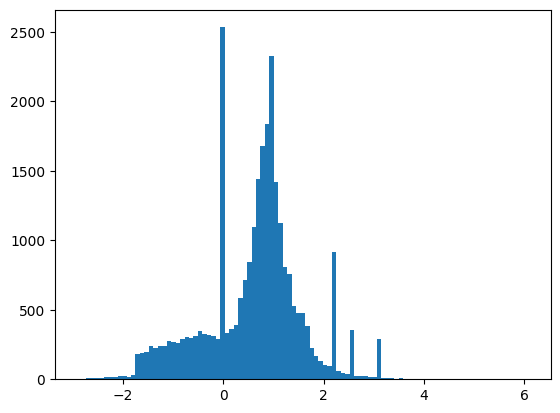

In [12]:
for features,label in packed_ds.batch(1000).take(1):
  print(features[0])
  plt.hist(features.numpy().flatten(), bins = 101)

이 튜토리얼을 비교적 짧게 유지하기 위해 처음 1,000개의 샘플만 검증에 사용하고 다음 10,000개는 훈련에 사용합니다.

In [13]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

`Dataset.skip` 및 `Dataset.take` 메서드를 사용하면 이를 쉽게 수행할 수 있습니다.

동시에 `Dataset.cache` 메서드를 사용하여 로더가 각 epoch에서 파일의 데이터를 다시 읽을 필요가 없도록 합니다.

In [14]:
validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()

In [15]:
train_ds

<CacheDataset element_spec=(TensorSpec(shape=(28,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

이러한 데이터세트는 개별 예제를 반환합니다. `Dataset.batch` 메서드를 사용하여 훈련에 적합한 크기의 배치를 생성합니다. 또한 배치를 처리하기 전에 훈련 세트에 대해 `Dataset.shuffle` 및 `Dataset.repeat`를 사용하는 것도 잊지 않도록 합니다.

In [16]:
validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)

## 과대적합 예제

과적합을 방지하는 가장 간단한 방법은 작은 모델, 즉 학습 가능한 매개변수 수가 적은 모델(레이어 수와 레이어당 단위 수에 의해 결정됨)로 시작하는 것입니다. 딥 러닝에서 모델의 학습 가능한 매개변수 수를 종종 모델의 "용량"이라고 합니다.

직관적으로 생각할 때 더 많은 매개변수를 가진 모델이 더 많은 "기억 용량"을 가지므로 훈련 샘플과 대상 간에 완벽한 사전과 같은 매핑, 일반화 능력이 없는 매핑을 쉽게 학습할 수 있지만 이전에 보지 못한 데이터에서 예측할 때는 이것이 쓸모가 없습니다.

항상 명심할 점! 딥 러닝 모델은 훈련 데이터에 피팅이 잘 되는 경향이 있지만 실제 문제는 피팅이 아닌 일반화입니다.

반면에 네트워크에 기억 리소스가 제한되어 있으면 매핑을 쉽게 학습할 수 없습니다. 손실을 최소화하려면 예측력이 더 높은 압축된 표현을 학습해야 합니다. 동시에 모델을 너무 작게 만들면 훈련 데이터에 피팅하기가  어렵습니다. "용량이 너무 많음"과 "용량이 충분하지 않음" 사이에 균형이 존재합니다.

불행히도 모델의 올바른 크기나 아키텍처(레이어 수 또는 각 레이어의 올바른 크기 측면에서)를 결정하는 마법과 같은 공식은 없습니다. 일련의 다른 아키텍처를 사용하여 실험해 보아야 합니다.

적절한 모델 크기를 찾으려면 비교적 적은 수의 레이어와 매개변수로 시작한 다음 유효성 검사 손실에 대한 이득 감소가 나타날 때까지 레이어의 크기를 늘리거나 새 레이어를 추가하는 것이 가장 좋습니다.

조밀하게 연결된 레이어(`tf.keras.layers.Dense`)만 사용하는 간단한 기준 모델로 시작한 다음 더 큰 모델을 만들고, 모델들을 서로 비교합니다.

### 기준 모델 만들기

훈련하는 동안 학습률을 점진적으로 낮추면 많은 모델이 더 잘 훈련됩니다. 시간 경과에 따른 학습률을 줄이려면 `tf.keras.optimizers.schedules`를 사용하세요.

In [17]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

위의 코드는 1,000 epoch에서 학습률을 기본 학습률의 1/2로, 2,000 epoch에서는 1/3로 쌍곡선 방식으로 줄이도록 `tf.keras.optimizers.schedules.InverseTimeDecay`를 설정합니다.

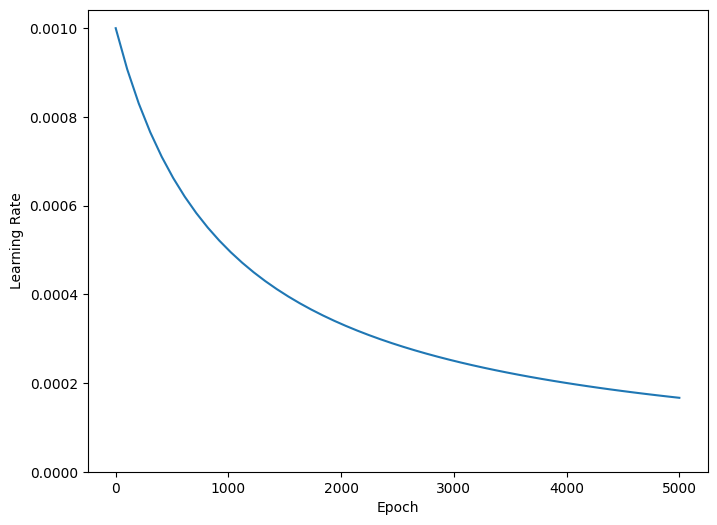

In [18]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')


이 튜토리얼의 각 모델은 동일한 훈련 구성을 사용합니다. 따라서 콜백 목록부터 시작하여 재사용 가능한 방식으로 설정하세요.

이 튜토리얼의 훈련은 다수의 짧은 epoch 동안 실행됩니다. 로깅 노이즈를 줄이기 위해 각 epoch에 대해 단순히 `.`을 인쇄하고 100개의 epoch마다 전체 메트릭을 인쇄하는 `tfdocs.EpochDots`를 사용합니다.

다음으로, 길고 불필요한 훈련 시간을 줄이기 위해 `tf.keras.callbacks.EarlyStopping`을 포함합니다. 이 콜백은 `val_loss`가 아니라 `val_binary_crossentropy`를 모니터링하도록 설정되어 있습니다. 이 차이는 나중에 중요합니다.

`callbacks.TensorBoard`를 사용하여 훈련에 대한 TensorBoard 로그를 생성합니다.


In [19]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

마찬가지로 각 모델은 동일한 `Model.compile` 및 `Model.fit` 설정을 사용합니다.

In [20]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

  model.summary()

  history = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validate_ds,
    callbacks=get_callbacks(name),
    verbose=0)
  return history

### 미소 모델

모델 훈련으로 시작합니다.

In [21]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1)
])

In [22]:
size_histories = {}

In [23]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 16)                464       


 dense_1 (Dense)             (None, 1)                 17        


Total params: 481


Trainable params: 481


Non-trainable params: 0


_________________________________________________________________



Epoch: 0, accuracy:0.4783,  binary_crossentropy:0.7896,  loss:0.7896,  val_accuracy:0.4640,  val_binary_crossentropy:0.7602,  val_loss:0.7602,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 100, accuracy:0.5962,  binary_crossentropy:0.6298,  loss:0.6298,  val_accuracy:0.5790,  val_binary_crossentropy:0.6283,  val_loss:0.6283,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 200, accuracy:0.6182,  binary_crossentropy:0.6188,  loss:0.6188,  val_accuracy:0.5820,  val_binary_crossentropy:0.6188,  val_loss:0.6188,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 300, accuracy:0.6336,  binary_crossentropy:0.6070,  loss:0.6070,  val_accuracy:0.6310,  val_binary_crossentropy:0.6054,  val_loss:0.6054,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 400, accuracy:0.6536,  binary_crossentropy:0.5961,  loss:0.5961,  val_accuracy:0.6440,  val_binary_crossentropy:0.5958,  val_loss:0.5958,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 500, accuracy:0.6601,  binary_crossentropy:0.5905,  loss:0.5905,  val_accuracy:0.6610,  val_binary_crossentropy:0.5902,  val_loss:0.5902,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 600, accuracy:0.6682,  binary_crossentropy:0.5868,  loss:0.5868,  val_accuracy:0.6490,  val_binary_crossentropy:0.5894,  val_loss:0.5894,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 700, accuracy:0.6723,  binary_crossentropy:0.5845,  loss:0.5845,  val_accuracy:0.6570,  val_binary_crossentropy:0.5879,  val_loss:0.5879,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 800, accuracy:0.6766,  binary_crossentropy:0.5827,  loss:0.5827,  val_accuracy:0.6730,  val_binary_crossentropy:0.5853,  val_loss:0.5853,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 900, accuracy:0.6741,  binary_crossentropy:0.5804,  loss:0.5804,  val_accuracy:0.6630,  val_binary_crossentropy:0.5841,  val_loss:0.5841,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1000, accuracy:0.6744,  binary_crossentropy:0.5791,  loss:0.5791,  val_accuracy:0.6670,  val_binary_crossentropy:0.5835,  val_loss:0.5835,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1100, accuracy:0.6752,  binary_crossentropy:0.5781,  loss:0.5781,  val_accuracy:0.6850,  val_binary_crossentropy:0.5810,  val_loss:0.5810,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1200, accuracy:0.6742,  binary_crossentropy:0.5768,  loss:0.5768,  val_accuracy:0.6890,  val_binary_crossentropy:0.5813,  val_loss:0.5813,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1300, accuracy:0.6783,  binary_crossentropy:0.5763,  loss:0.5763,  val_accuracy:0.6810,  val_binary_crossentropy:0.5811,  val_loss:0.5811,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1400, accuracy:0.6786,  binary_crossentropy:0.5753,  loss:0.5753,  val_accuracy:0.6910,  val_binary_crossentropy:0.5806,  val_loss:0.5806,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1500, accuracy:0.6800,  binary_crossentropy:0.5744,  loss:0.5744,  val_accuracy:0.6800,  val_binary_crossentropy:0.5808,  val_loss:0.5808,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1600, accuracy:0.6806,  binary_crossentropy:0.5735,  loss:0.5735,  val_accuracy:0.6800,  val_binary_crossentropy:0.5801,  val_loss:0.5801,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1700, accuracy:0.6812,  binary_crossentropy:0.5725,  loss:0.5725,  val_accuracy:0.6910,  val_binary_crossentropy:0.5780,  val_loss:0.5780,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1800, accuracy:0.6853,  binary_crossentropy:0.5720,  loss:0.5720,  val_accuracy:0.6890,  val_binary_crossentropy:0.5783,  val_loss:0.5783,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1900, accuracy:0.6835,  binary_crossentropy:0.5710,  loss:0.5710,  val_accuracy:0.6920,  val_binary_crossentropy:0.5773,  val_loss:0.5773,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 2000, accuracy:0.6799,  binary_crossentropy:0.5704,  loss:0.5704,  val_accuracy:0.6970,  val_binary_crossentropy:0.5763,  val_loss:0.5763,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 2100, accuracy:0.6826,  binary_crossentropy:0.5699,  loss:0.5699,  val_accuracy:0.6920,  val_binary_crossentropy:0.5760,  val_loss:0.5760,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 2200, accuracy:0.6893,  binary_crossentropy:0.5691,  loss:0.5691,  val_accuracy:0.6790,  val_binary_crossentropy:0.5765,  val_loss:0.5765,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 2300, accuracy:0.6853,  binary_crossentropy:0.5683,  loss:0.5683,  val_accuracy:0.6940,  val_binary_crossentropy:0.5750,  val_loss:0.5750,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 2400, accuracy:0.6882,  binary_crossentropy:0.5675,  loss:0.5675,  val_accuracy:0.6870,  val_binary_crossentropy:0.5751,  val_loss:0.5751,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 2500, accuracy:0.6877,  binary_crossentropy:0.5669,  loss:0.5669,  val_accuracy:0.6810,  val_binary_crossentropy:0.5756,  val_loss:0.5756,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 2600, accuracy:0.6878,  binary_crossentropy:0.5664,  loss:0.5664,  val_accuracy:0.6910,  val_binary_crossentropy:0.5738,  val_loss:0.5738,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 2700, accuracy:0.6850,  binary_crossentropy:0.5657,  loss:0.5657,  val_accuracy:0.6930,  val_binary_crossentropy:0.5731,  val_loss:0.5731,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 2800, accuracy:0.6874,  binary_crossentropy:0.5651,  loss:0.5651,  val_accuracy:0.6910,  val_binary_crossentropy:0.5733,  val_loss:0.5733,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 2900, accuracy:0.6887,  binary_crossentropy:0.5646,  loss:0.5646,  val_accuracy:0.6850,  val_binary_crossentropy:0.5731,  val_loss:0.5731,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 3000, accuracy:0.6865,  binary_crossentropy:0.5642,  loss:0.5642,  val_accuracy:0.6930,  val_binary_crossentropy:0.5719,  val_loss:0.5719,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 3100, accuracy:0.6898,  binary_crossentropy:0.5636,  loss:0.5636,  val_accuracy:0.6930,  val_binary_crossentropy:0.5720,  val_loss:0.5720,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 3200, accuracy:0.6864,  binary_crossentropy:0.5631,  loss:0.5631,  val_accuracy:0.6910,  val_binary_crossentropy:0.5718,  val_loss:0.5718,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 3300, accuracy:0.6888,  binary_crossentropy:0.5626,  loss:0.5626,  val_accuracy:0.6930,  val_binary_crossentropy:0.5712,  val_loss:0.5712,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 3400, accuracy:0.6948,  binary_crossentropy:0.5622,  loss:0.5622,  val_accuracy:0.6870,  val_binary_crossentropy:0.5720,  val_loss:0.5720,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 3500, accuracy:0.6927,  binary_crossentropy:0.5616,  loss:0.5616,  val_accuracy:0.6860,  val_binary_crossentropy:0.5714,  val_loss:0.5714,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 3600, accuracy:0.6935,  binary_crossentropy:0.5611,  loss:0.5611,  val_accuracy:0.6940,  val_binary_crossentropy:0.5708,  val_loss:0.5708,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 3700, accuracy:0.6927,  binary_crossentropy:0.5609,  loss:0.5609,  val_accuracy:0.6860,  val_binary_crossentropy:0.5711,  val_loss:0.5711,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 3800, accuracy:0.6949,  binary_crossentropy:0.5603,  loss:0.5603,  val_accuracy:0.6830,  val_binary_crossentropy:0.5718,  val_loss:0.5718,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 3900, accuracy:0.6941,  binary_crossentropy:0.5598,  loss:0.5598,  val_accuracy:0.6840,  val_binary_crossentropy:0.5709,  val_loss:0.5709,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 4000, accuracy:0.6950,  binary_crossentropy:0.5596,  loss:0.5596,  val_accuracy:0.6870,  val_binary_crossentropy:0.5709,  val_loss:0.5709,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 4100, accuracy:0.6953,  binary_crossentropy:0.5592,  loss:0.5592,  val_accuracy:0.6860,  val_binary_crossentropy:0.5702,  val_loss:0.5702,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 4200, accuracy:0.6940,  binary_crossentropy:0.5589,  loss:0.5589,  val_accuracy:0.6890,  val_binary_crossentropy:0.5699,  val_loss:0.5699,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 4300, accuracy:0.6900,  binary_crossentropy:0.5584,  loss:0.5584,  val_accuracy:0.6890,  val_binary_crossentropy:0.5696,  val_loss:0.5696,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 4400, accuracy:0.6951,  binary_crossentropy:0.5580,  loss:0.5580,  val_accuracy:0.6830,  val_binary_crossentropy:0.5702,  val_loss:0.5702,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 4500, accuracy:0.6922,  binary_crossentropy:0.5577,  loss:0.5577,  val_accuracy:0.6920,  val_binary_crossentropy:0.5689,  val_loss:0.5689,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 4600, accuracy:0.6902,  binary_crossentropy:0.5578,  loss:0.5578,  val_accuracy:0.6960,  val_binary_crossentropy:0.5680,  val_loss:0.5680,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 4700, accuracy:0.6959,  binary_crossentropy:0.5571,  loss:0.5571,  val_accuracy:0.6890,  val_binary_crossentropy:0.5689,  val_loss:0.5689,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 4800, accuracy:0.6928,  binary_crossentropy:0.5568,  loss:0.5568,  val_accuracy:0.6890,  val_binary_crossentropy:0.5686,  val_loss:0.5686,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 4900, accuracy:0.6944,  binary_crossentropy:0.5564,  loss:0.5564,  val_accuracy:0.6870,  val_binary_crossentropy:0.5684,  val_loss:0.5684,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 5000, accuracy:0.6970,  binary_crossentropy:0.5562,  loss:0.5562,  val_accuracy:0.6810,  val_binary_crossentropy:0.5689,  val_loss:0.5689,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 5100, accuracy:0.6983,  binary_crossentropy:0.5560,  loss:0.5560,  val_accuracy:0.6840,  val_binary_crossentropy:0.5696,  val_loss:0.5696,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 5200, accuracy:0.6987,  binary_crossentropy:0.5556,  loss:0.5556,  val_accuracy:0.6840,  val_binary_crossentropy:0.5683,  val_loss:0.5683,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 5300, accuracy:0.6956,  binary_crossentropy:0.5554,  loss:0.5554,  val_accuracy:0.6820,  val_binary_crossentropy:0.5685,  val_loss:0.5685,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 5400, accuracy:0.6937,  binary_crossentropy:0.5551,  loss:0.5551,  val_accuracy:0.6860,  val_binary_crossentropy:0.5674,  val_loss:0.5674,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

이제 모델이 어떻게 작동했는지 확인합니다.

(0.5, 0.7)

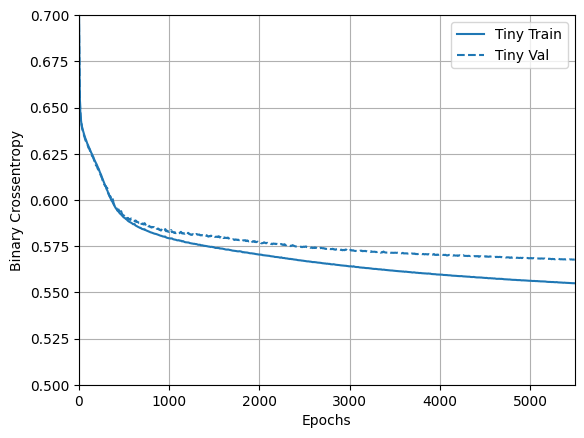

In [24]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])

### 작은 모델

작은 모델의 성능을 능가할 수 있는지 확인하기 위해 일부 큰 모델을 점진적으로 훈련합니다.

각각 16개 단위가 있는 두 개의 숨겨진 레이어를 사용해 봅니다.

In [25]:
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(16, activation='elu'),
    layers.Dense(1)
])

In [26]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense_2 (Dense)             (None, 16)                464       


 dense_3 (Dense)             (None, 16)                272       


 dense_4 (Dense)             (None, 1)                 17        


Total params: 753


Trainable params: 753


Non-trainable params: 0


_________________________________________________________________



Epoch: 0, accuracy:0.5009,  binary_crossentropy:0.7442,  loss:0.7442,  val_accuracy:0.4870,  val_binary_crossentropy:0.7259,  val_loss:0.7259,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 100, accuracy:0.6385,  binary_crossentropy:0.6035,  loss:0.6035,  val_accuracy:0.6190,  val_binary_crossentropy:0.6053,  val_loss:0.6053,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 200, accuracy:0.6680,  binary_crossentropy:0.5874,  loss:0.5874,  val_accuracy:0.6420,  val_binary_crossentropy:0.5969,  val_loss:0.5969,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 300, accuracy:0.6770,  binary_crossentropy:0.5790,  loss:0.5790,  val_accuracy:0.6480,  val_binary_crossentropy:0.5930,  val_loss:0.5930,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 400, accuracy:0.6866,  binary_crossentropy:0.5733,  loss:0.5733,  val_accuracy:0.6510,  val_binary_crossentropy:0.5888,  val_loss:0.5888,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 500, accuracy:0.6867,  binary_crossentropy:0.5675,  loss:0.5675,  val_accuracy:0.6570,  val_binary_crossentropy:0.5875,  val_loss:0.5875,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 600, accuracy:0.6952,  binary_crossentropy:0.5621,  loss:0.5621,  val_accuracy:0.6590,  val_binary_crossentropy:0.5882,  val_loss:0.5882,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 700, accuracy:0.6990,  binary_crossentropy:0.5585,  loss:0.5585,  val_accuracy:0.6570,  val_binary_crossentropy:0.5884,  val_loss:0.5884,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

### 작은 모델 만들기

이제 각각 64개의 단위가 있는 3개의 숨겨진 레이어를 시도하겠습니다.

In [27]:
medium_model = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)
])

같은 데이터를 사용해 이 모델을 훈련합니다:

In [28]:
size_histories['Medium']  = compile_and_fit(medium_model, "sizes/Medium")

Model: "sequential_2"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense_5 (Dense)             (None, 64)                1856      


 dense_6 (Dense)             (None, 64)                4160      


 dense_7 (Dense)             (None, 64)                4160      


 dense_8 (Dense)             (None, 1)                 65        


Total params: 10,241


Trainable params: 10,241


Non-trainable params: 0


_________________________________________________________________



Epoch: 0, accuracy:0.4941,  binary_crossentropy:0.7015,  loss:0.7015,  val_accuracy:0.4630,  val_binary_crossentropy:0.6859,  val_loss:0.6859,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 100, accuracy:0.7154,  binary_crossentropy:0.5313,  loss:0.5313,  val_accuracy:0.6670,  val_binary_crossentropy:0.6012,  val_loss:0.6012,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 200, accuracy:0.7714,  binary_crossentropy:0.4463,  loss:0.4463,  val_accuracy:0.6680,  val_binary_crossentropy:0.6603,  val_loss:0.6603,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

### 큰 모델 만들기

연습으로 더 큰 모델을 만들고 얼마나 빨리 과대적합을 시작하는지 확인할 수 있습니다. 다음으로, 문제가 보증하는 것보다 훨씬 더 많은 용량의 네트워크를 이 벤치마크에 추가합니다.

In [29]:
large_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(1)
])

역시 같은 데이터를 사용해 모델을 훈련합니다:

In [30]:
size_histories['large'] = compile_and_fit(large_model, "sizes/large")

Model: "sequential_3"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense_9 (Dense)             (None, 512)               14848     


 dense_10 (Dense)            (None, 512)               262656    


 dense_11 (Dense)            (None, 512)               262656    


 dense_12 (Dense)            (None, 512)               262656    


 dense_13 (Dense)            (None, 1)                 513       


Total params: 803,329


Trainable params: 803,329


Non-trainable params: 0


_________________________________________________________________



Epoch: 0, accuracy:0.5049,  binary_crossentropy:0.8523,  loss:0.8523,  val_accuracy:0.5010,  val_binary_crossentropy:0.6775,  val_loss:0.6775,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 100, accuracy:1.0000,  binary_crossentropy:0.0026,  loss:0.0026,  val_accuracy:0.6710,  val_binary_crossentropy:1.6425,  val_loss:1.6425,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 200, accuracy:1.0000,  binary_crossentropy:0.0002,  loss:0.0002,  val_accuracy:0.6780,  val_binary_crossentropy:2.2920,  val_loss:2.2920,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

### 훈련 손실과 검증 손실 그래프 그리기

실선은 훈련 손실을 나타내고 점선은 유효성 검사 손실을 나타냅니다(기억할 점: 유효성 검사 손실이 낮을수록 더 나은 모델을 나타냄).

더 큰 모델을 빌드하면 더 많은 파워가 제공되지만 이 파워가 어떤 이유로 제한되지 않으면 훈련 세트에 쉽게 과대적합될 수 있습니다.

이 예에서는 일반적으로 `"Tiny"` 모델만 과대적합을 완전히 피하고 더 큰 각 모델은 데이터를 더 빠르게 과대적합합니다. `"large"` 모델의 경우 이것이 너무 심각해져서 실제로 어떤 상황이 발생하는지 파악하려면 플롯을 로그 스케일로 전환해야 합니다.

검증 메트릭을 플롯하고 이를 훈련 메트릭과 비교하면 이것이 분명해집니다.

- 약간의 차이가 있는 것이 정상입니다.
- 두 메트릭이 같은 방향으로 움직이면 모든 것이 정상입니다.
- 훈련 메트릭이 계속 개선되는 동안 검증 메트릭이 정체되기 시작하면 과대적합에 가까워진 것입니다.
- 검증 메트릭이 잘못된 방향으로 가고 있다면 모델이 확실하게 과대적합된 것입니다.

Text(0.5, 0, 'Epochs [Log Scale]')

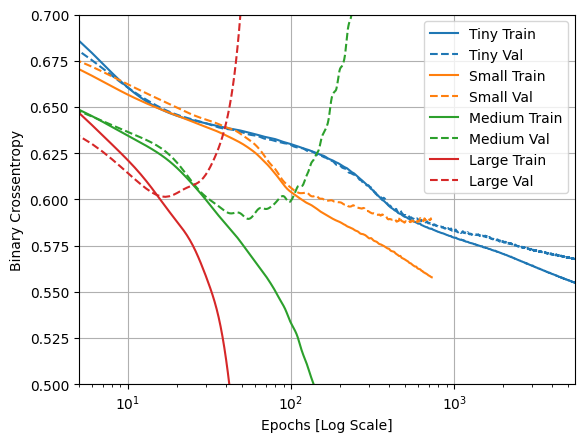

In [31]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 0.7])
plt.xlabel("Epochs [Log Scale]")

참고: 위의 모든 훈련 실행은 모델이 개선되지 않는다는 것이 분명해지면 훈련을 종료하도록 `callbacks.EarlyStopping`을 사용했습니다.

### TensorBoard에서 보기

이러한 모델은 모두 훈련 중에 TensorBoard 로그를 작성했습니다.

노트북 내에 내장된 TensorBoard 뷰어를 엽니다.

In [ ]:
#docs_infra: no_execute

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}/sizes

[TensorBoard.dev](https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97)에서 이 노트북의 [이전 실행 결과](https://tensorboard.dev/)를 볼 수 있습니다.

TensorBoard.dev는 ML 실험을 호스팅 및 추적하고 모든 사람과 공유하기 위한 관리 환경입니다.

편의를 위해 `<iframe>`에도 포함시켰습니다.

In [32]:
display.IFrame(
    src="https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97",
    width="100%", height="800px")

TensorBoard 결과를 공유하려면 다음을 코드 셀에 복사하여 [TensorBoard.dev](https://tensorboard.dev/)에 로그를 업로드할 수 있습니다.

참고: 이 단계에는 Google 계정이 필요합니다.

```
!tensorboard dev upload --logdir  {logdir}/sizes
```

주의: 이 명령은 종료되지 않으며, 장기 실험 결과를 지속적으로 업로드하도록 설계되었습니다. 데이터가 업로드되면 노트북 도구의 "실행 중단" 옵션을 사용하여 이를 중지해야 합니다.

## 과대적합을 방지하기 위한 전략

이 섹션의 내용을 시작하기 전에 위의 `"Tiny"` 모델에서 훈련 로그를 복사하여 비교 기준으로 사용합니다.

In [33]:
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

PosixPath('/tmpfs/tmp/tmp2olss4vj/tensorboard_logs/regularizers/Tiny')

In [34]:
regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

### 가중치를 규제하기


아마도 오캄의 면도날(Occam's Razor) 이론을 들어 보았을 것입니다. 어떤 것을 설명하는 두 가지 방법이 있다면 더 정확한 설명은 최소한의 가정이 필요한 가장 "간단한" 설명일 것입니다. 이는 신경망으로 학습되는 모델에도 적용됩니다. 훈련 데이터와 네트워크 구조가 주어졌을 때 이 데이터를 설명할 수 있는 가중치의 조합(즉, 가능한 모델)은 많습니다. 간단한 모델은 복잡한 것보다 과대적합되는 경향이 작을 것입니다.

여기에서 "간단한 모델"은 매개변수 값의 분포가 엔트로피가 적은 모델(또는 위의 섹션에서 설명한 것처럼 매개변수가 모두 거의 없는 모델)입니다. 따라서 과대적합을 완화하는 일반적인 방법은 가중치가 작은 값만 사용하도록 하여 가중치 값의 분포를 보다 "정규화"하여 네트워크의 복잡성에 제약을 가하는 것입니다. 이것을 "가중치 정규화"라고 하며, 큰 가중치를 갖는 것과 관련된 비용을 네트워크의 손실 함수에 추가하는 방식으로 수행됩니다. 이 비용은 다음과 같이 두 가지 형태로 제공됩니다.

- [L1 규제](https://developers.google.com/machine-learning/glossary/#L1_regularization)는 가중치의 절댓값에 비례하는 비용이 추가됩니다(즉, 가중치의 "L1 노름(norm)"을 추가합니다).

- [L2 규제](https://developers.google.com/machine-learning/glossary/#L2_regularization)는 가중치의 제곱에 비례하는 비용이 추가됩니다(즉, 가중치의 "L2 노름"의 제곱을 추가합니다). 신경망에서는 L2 규제를 가중치 감쇠(weight decay)라고도 부릅니다. 이름이 다르지만 혼돈하지 마세요. 가중치 감쇠는 수학적으로 L2 규제와 동일합니다.

L1 정규화는 가중치를 정확히 0으로 푸시하여 희소 모델을 유도합니다. L2 정규화는 가중치 매개변수를 희소하게 만들지 않고 여기에 페널티를 부여하는데 이는 작은 가중치에 대해서는 페널티가 0이 되기 때문입니다(L2가 더 일반적인 이유 중 하나).

`tf.keras`에서는 가중치 정규화 인스턴스를 레이어에 키워드 인수로 전달함으로써 가중치 정규화가 추가됩니다. L2 가중치 정규화 추가:

In [35]:
l2_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

Model: "sequential_4"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense_14 (Dense)            (None, 512)               14848     


 dense_15 (Dense)            (None, 512)               262656    


 dense_16 (Dense)            (None, 512)               262656    


 dense_17 (Dense)            (None, 512)               262656    


 dense_18 (Dense)            (None, 1)                 513       


Total params: 803,329


Trainable params: 803,329


Non-trainable params: 0


_________________________________________________________________



Epoch: 0, accuracy:0.4939,  binary_crossentropy:0.8613,  loss:2.3928,  val_accuracy:0.5460,  val_binary_crossentropy:0.6746,  val_loss:2.1433,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 100, accuracy:0.6558,  binary_crossentropy:0.5976,  loss:0.6207,  val_accuracy:0.6840,  val_binary_crossentropy:0.5902,  val_loss:0.6129,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 200, accuracy:0.6701,  binary_crossentropy:0.5837,  loss:0.6066,  val_accuracy:0.6390,  val_binary_crossentropy:0.5810,  val_loss:0.6044,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 300, accuracy:0.6825,  binary_crossentropy:0.5757,  loss:0.5996,  val_accuracy:0.6650,  val_binary_crossentropy:0.5834,  val_loss:0.6071,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 400, accuracy:0.6943,  binary_crossentropy:0.5639,  loss:0.5886,  val_accuracy:0.6600,  val_binary_crossentropy:0.5897,  val_loss:0.6143,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 500, accuracy:0.6952,  binary_crossentropy:0.5571,  loss:0.5838,  val_accuracy:0.6820,  val_binary_crossentropy:0.5785,  val_loss:0.6051,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 600, accuracy:0.7062,  binary_crossentropy:0.5479,  loss:0.5765,  val_accuracy:0.7050,  val_binary_crossentropy:0.5786,  val_loss:0.6069,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 700, accuracy:0.7059,  binary_crossentropy:0.5427,  loss:0.5710,  val_accuracy:0.6850,  val_binary_crossentropy:0.5773,  val_loss:0.6057,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 800, accuracy:0.7089,  binary_crossentropy:0.5381,  loss:0.5671,  val_accuracy:0.7030,  val_binary_crossentropy:0.5864,  val_loss:0.6153,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

`l2(0.001)`는 네트워크의 전체 손실에 층에 있는 가중치 행렬의 모든 값이 `0.001 * weight_coefficient_value**2`만큼 더해진다는 의미입니다. 이런 페널티(penalty)는 훈련할 때만 추가됩니다. 따라서 테스트 단계보다 훈련 단계에서 네트워크 손실이 훨씬 더 클 것입니다.

이것이 바로 우리가 `binary_crossentropy`를 직접 모니터링하는 이유입니다. 이 정규화 구성 요소가 혼합되어 있지 않기 때문입니다.

따라서 `L2` 정규화 패널티가 있는 이 동일한 `"Large"` 모델의 성능이 훨씬 더 좋습니다.


(0.5, 0.7)

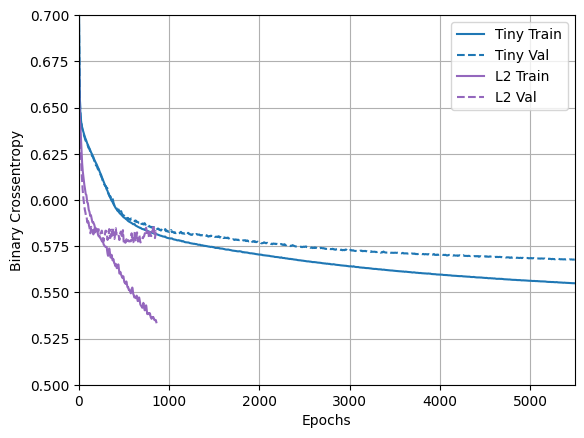

In [36]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

위의 다이어그램과 같이 `"L2"` 정규화 모델은 `"Tiny"` 모델에 비해 훨씬 더 경쟁력이 있습니다. 이 `"L2"` 모델은 동일한 수의 매개변수를 가지고 있음에도 기반을 두고 있는 `"Large"` 모델보다 과대적합에 훨씬 더 강합니다.

#### 더 많은 정보

다음과 같이 이러한 종류의 정규화에 대해 주목해야 할 두 가지 중요한 사항이 있습니다.

1. 자체 훈련 루프를 작성하는 경우 모델에 정규화 손실을 요청해야 합니다.

In [37]:
result = l2_model(features)
regularization_loss=tf.add_n(l2_model.losses)

1. 이 구현은 모델의 손실에 가중치 패널티를 추가한 다음 표준 최적화 절차를 적용하는 식으로 작동합니다.

대신에 원시 손실에 대해서만 옵티마이저를 실행한 다음 계산된 단계를 적용하는 동안 옵티마이저가 약간의 가중치 감소를 적용하는 두 번째 접근 방식이 있습니다. 이 "분리된 가중치 감소"는 `tf.keras.optimizers.Ftrl` 및 `tfa.optimizers.AdamW`와 같은 옵티마이저에서 사용됩니다.

### 드롭아웃 추가하기

드롭아웃은 신경망에 대해 가장 효과적이고 가장 일반적으로 사용되는 정규화 기술 중 하나로, 토론토 대학에서 Hinton과 그의 학생들이 개발했습니다.

드롭아웃을 직관적으로 설명하면, 네트워크의 개별 노드가 다른 노드의 출력에 의존할 수 없기 때문에 각 노드는 자체적으로 유용한 요소를 출력해야 한다는 것입니다.

레이어에 적용되는 드롭아웃은 훈련 중에 레이어의 여러 출력 요소를 무작위로 "드롭아웃"(즉, 0으로 설정)하는 식으로 작동합니다. 예를 들어 보통의 경우 주어진 레이어는 훈련 중 주어진 입력 샘플에 대해 벡터 `[0.2, 0.5, 1.3, 0.8, 1.1]`을 반환할 수 있습니다. 드롭아웃을 적용한 후 이 벡터에는 무작위로 분포된 몇 개의 0 항목이 있습니다(예: `[0, 0.5, 1.3, 0, 1.1]`).

"드롭아웃 비율"은 0이 되는 특성의 비율로, 일반적으로 0.2에서 0.5 사이로 설정됩니다. 테스트 시간에는 어떤 유닛도 드롭아웃되지 않고 대신 레이어의 출력 값이 드롭아웃 비율과 동일한 계수만큼 축소되는데, 이는 훈련 시간에 더 많은 유닛이 활성화된다는 사실과 균형을 맞추기 위해서입니다.

Keras에서 `tf.keras.layers.Dropout` 레이어를 통해 네트워크에 드롭아웃을 도입할 수 있습니다. 이 레이어는 직전 레이어의 출력에 적용됩니다.

네트워크에 두 개의 드롭아웃 레이어를 추가하여 과대적합을 줄이는 효과가 얼마나 되는지 확인해보겠습니다.

In [38]:
dropout_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, "regularizers/dropout")

Model: "sequential_5"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense_19 (Dense)            (None, 512)               14848     


 dropout (Dropout)           (None, 512)               0         


 dense_20 (Dense)            (None, 512)               262656    


 dropout_1 (Dropout)         (None, 512)               0         


 dense_21 (Dense)            (None, 512)               262656    


 dropout_2 (Dropout)         (None, 512)               0         


 dense_22 (Dense)            (None, 512)               262656    


 dropout_3 (Dropout)         (None, 512)               0         


 dense_23 (Dense)            (None, 1)                 513       


Total params: 803,329


Trainable params: 803,329


Non-trainable params: 0


_________________________________________________________________



Epoch: 0, accuracy:0.5053,  binary_crossentropy:0.7983,  loss:0.7983,  val_accuracy:0.5350,  val_binary_crossentropy:0.6868,  val_loss:0.6868,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 100, accuracy:0.6554,  binary_crossentropy:0.5989,  loss:0.5989,  val_accuracy:0.6590,  val_binary_crossentropy:0.5853,  val_loss:0.5853,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 200, accuracy:0.6821,  binary_crossentropy:0.5590,  loss:0.5590,  val_accuracy:0.6950,  val_binary_crossentropy:0.5873,  val_loss:0.5873,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 300, accuracy:0.7226,  binary_crossentropy:0.5049,  loss:0.5049,  val_accuracy:0.6790,  val_binary_crossentropy:0.6041,  val_loss:0.6041,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

(0.5, 0.7)

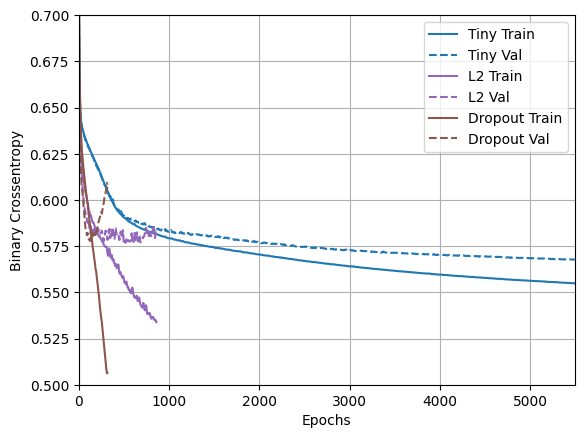

In [39]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

이 플롯으로부터 이러한 정규화 접근 방식 모두 `"Large"` 모델의 동작을 개선한다는 것이 분명합니다. 그러나 여전히 `"Tiny"` 기준을 넘어서지는 못합니다.

다음으로, 둘 다 함께 시도하고 더 나은지 확인합니다.

### L2 + 드롭아웃 결합

In [40]:
combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")

Model: "sequential_6"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense_24 (Dense)            (None, 512)               14848     


 dropout_4 (Dropout)         (None, 512)               0         


 dense_25 (Dense)            (None, 512)               262656    


 dropout_5 (Dropout)         (None, 512)               0         


 dense_26 (Dense)            (None, 512)               262656    


 dropout_6 (Dropout)         (None, 512)               0         


 dense_27 (Dense)            (None, 512)               262656    


 dropout_7 (Dropout)         (None, 512)               0         


 dense_28 (Dense)            (None, 1)                 513       


Total params: 803,329


Trainable params: 803,329


Non-trainable params: 0


_________________________________________________________________



Epoch: 0, accuracy:0.4986,  binary_crossentropy:0.8003,  loss:0.9587,  val_accuracy:0.4630,  val_binary_crossentropy:0.6964,  val_loss:0.8542,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 100, accuracy:0.6505,  binary_crossentropy:0.6025,  loss:0.6322,  val_accuracy:0.6560,  val_binary_crossentropy:0.5825,  val_loss:0.6121,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 200, accuracy:0.6614,  binary_crossentropy:0.5900,  loss:0.6157,  val_accuracy:0.6830,  val_binary_crossentropy:0.5715,  val_loss:0.5972,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 300, accuracy:0.6696,  binary_crossentropy:0.5836,  loss:0.6118,  val_accuracy:0.6750,  val_binary_crossentropy:0.5625,  val_loss:0.5906,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 400, accuracy:0.6775,  binary_crossentropy:0.5777,  loss:0.6079,  val_accuracy:0.6940,  val_binary_crossentropy:0.5538,  val_loss:0.5840,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 500, accuracy:0.6820,  binary_crossentropy:0.5728,  loss:0.6048,  val_accuracy:0.7060,  val_binary_crossentropy:0.5494,  val_loss:0.5814,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 600, accuracy:0.6808,  binary_crossentropy:0.5673,  loss:0.6011,  val_accuracy:0.6990,  val_binary_crossentropy:0.5444,  val_loss:0.5781,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 700, accuracy:0.6846,  binary_crossentropy:0.5658,  loss:0.6011,  val_accuracy:0.6880,  val_binary_crossentropy:0.5429,  val_loss:0.5782,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 800, accuracy:0.6907,  binary_crossentropy:0.5578,  loss:0.5945,  val_accuracy:0.6970,  val_binary_crossentropy:0.5422,  val_loss:0.5789,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 900, accuracy:0.6917,  binary_crossentropy:0.5578,  loss:0.5958,  val_accuracy:0.6930,  val_binary_crossentropy:0.5406,  val_loss:0.5786,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


Epoch: 1000, accuracy:0.6987,  binary_crossentropy:0.5511,  loss:0.5903,  val_accuracy:0.7070,  val_binary_crossentropy:0.5452,  val_loss:0.5844,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

(0.5, 0.7)

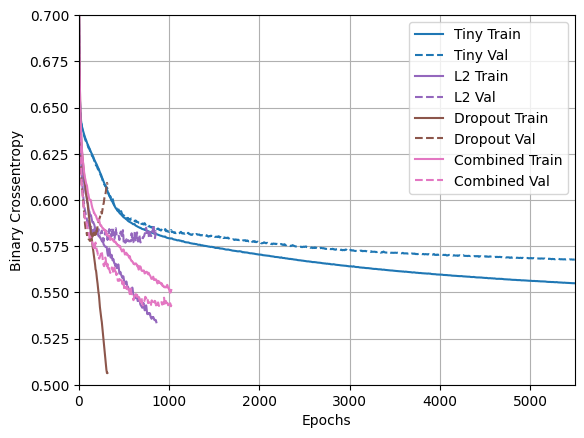

In [41]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

`"Combined"` 정규화가 있는 이 모델은 분명히 지금까지 최고의 모델입니다.

### TensorBoard에서 보기

이러한 모델은 TensorBoard 로그도 기록했습니다.

노트북 내에 내장된 Tensorboard 뷰어를 열려면 코드 셀에 다음 내용을 복사하세요.

```
%tensorboard --logdir {logdir}/regularizers
```

[TensorBoard.dev](https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97)에서 이 노트북의 [이전 실행 결과](https://tensorboard.dev/)를 볼 수 있습니다.

편의를 위해 `<iframe>`에도 포함시켰습니다.

In [42]:
display.IFrame(
    src="https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97",
    width = "100%",
    height="800px")


다음과 함께 업로드되었습니다.

```
!tensorboard dev upload --logdir  {logdir}/regularizers
```

## 결론

요약하자면 신경망에서 과대적합을 방지하는 가장 일반적인 방법은 다음과 같습니다.

- 더 많은 훈련 데이터를 얻음
- 네트워크 용량을 줄임
- 가중치 정규화를 추가함
- 드롭아웃을 추가함

이 가이드에서 다루지 않는 두 가지 중요한 접근 방식은 다음과 같습니다.

- 데이터 증강
- 배치 정규화(`tf.keras.layers.BatchNormalization`)

각 방법은 그 자체로 도움이 될 수 있지만 이를 결합하여 더 큰 효과를 거둘 수 있는 경우가 종종 있다는 점을 기억하기 바랍니다.